# Setup

## Mount Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ROOT_FOLDER = "/content/drive/MyDrive/Colab Notebooks/Machine_Learning/EDA_project/Dataset"

## Importing necessary libraries & dataset

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import statsmodels.api as sm


In [ ]:
# Loading data from 'StudentsPerformance.csv' file into a DataFrame
df = pd.read_csv(f'{ROOT_FOLDER}/StudentsPerformance.csv')

# Display the first 5 rows of the customers data to get an overview of the dataset
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Data Exploration

## To check all the columns

In [ ]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

### Dataset information

gender : sex of students -> (Male/female)

race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)

parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)

lunch : having lunch before test (standard or free/reduced)

test preparation course : complete or not complete before test

math score

reading score

writing score

## To check shape of the imported datasets


In [ ]:
df.shape
print(f"StudentsPerformance data has {df.shape[0]} data points and {df.shape[1]} features.")

StudentsPerformance data has 1000 data points and 8 features.


## To check for missing values

In [ ]:
df.isnull().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


### Insight : No missing values are present

## To check for duplicate values

In [ ]:
#checking duplicate values
df.duplicated().sum()

0

### Insight :

No duplicate value present

## To describe statistics for numeric columns in the DataFrame

In [ ]:
#checking for outliers
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight
- From above description of numerical data, all means are very close to each other - between 66 and 68.05;
- All standard deviations are also close - between 14.6 and 15.19;
- While there is a minimum score  0 for math, for writing minimum is much higher = 10 and for reading much higher = 17


## Plotting Histogram plots for different scores.

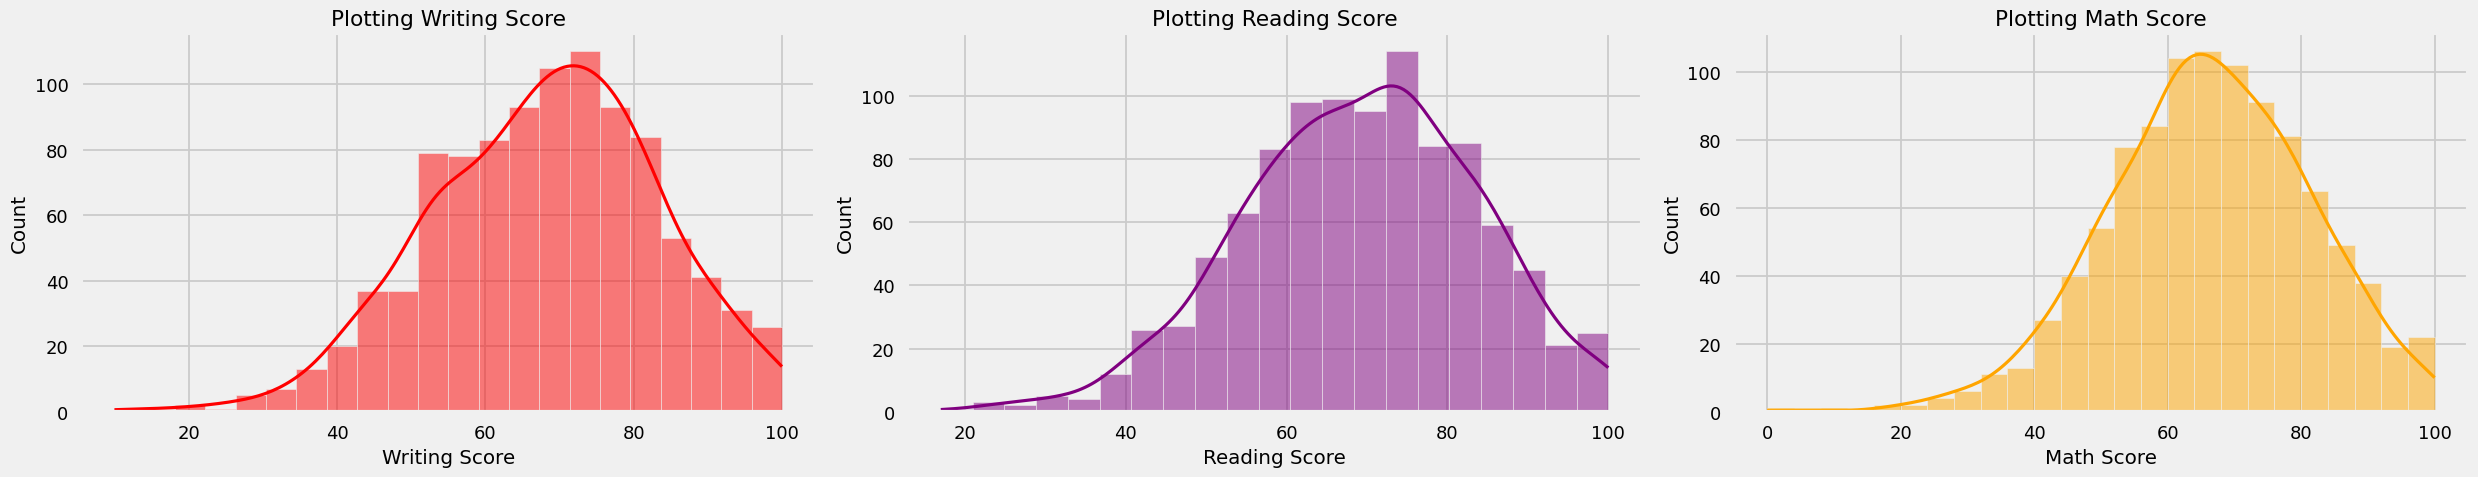

In [ ]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 3, figsize=(25, 5))

# Plotting Writing Score
sns.histplot(df['writing score'], kde=True, color="Red", ax=axs[0])
axs[0].set_title("Plotting Writing Score")
axs[0].set_xlabel("Writing Score")
axs[0].set_ylabel("Count")

# Plotting Reading Score
sns.histplot(df['reading score'], kde=True, color="purple", ax=axs[1])
axs[1].set_title("Plotting Reading Score")
axs[1].set_xlabel("Reading Score")
axs[1].set_ylabel("Count")

# Plotting Math Score
sns.histplot(df['math score'], kde=True, color='Orange', ax=axs[2])
axs[2].set_title("Plotting Math Score")
axs[2].set_xlabel("Math Score")
axs[2].set_ylabel("Count")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


### Insight :
The histograms show that the scores in writing, reading, and math are slightly left-skewed, with most students scoring between 60 and 80 in all three subjects.

## Plotting Box plot to check for outliers

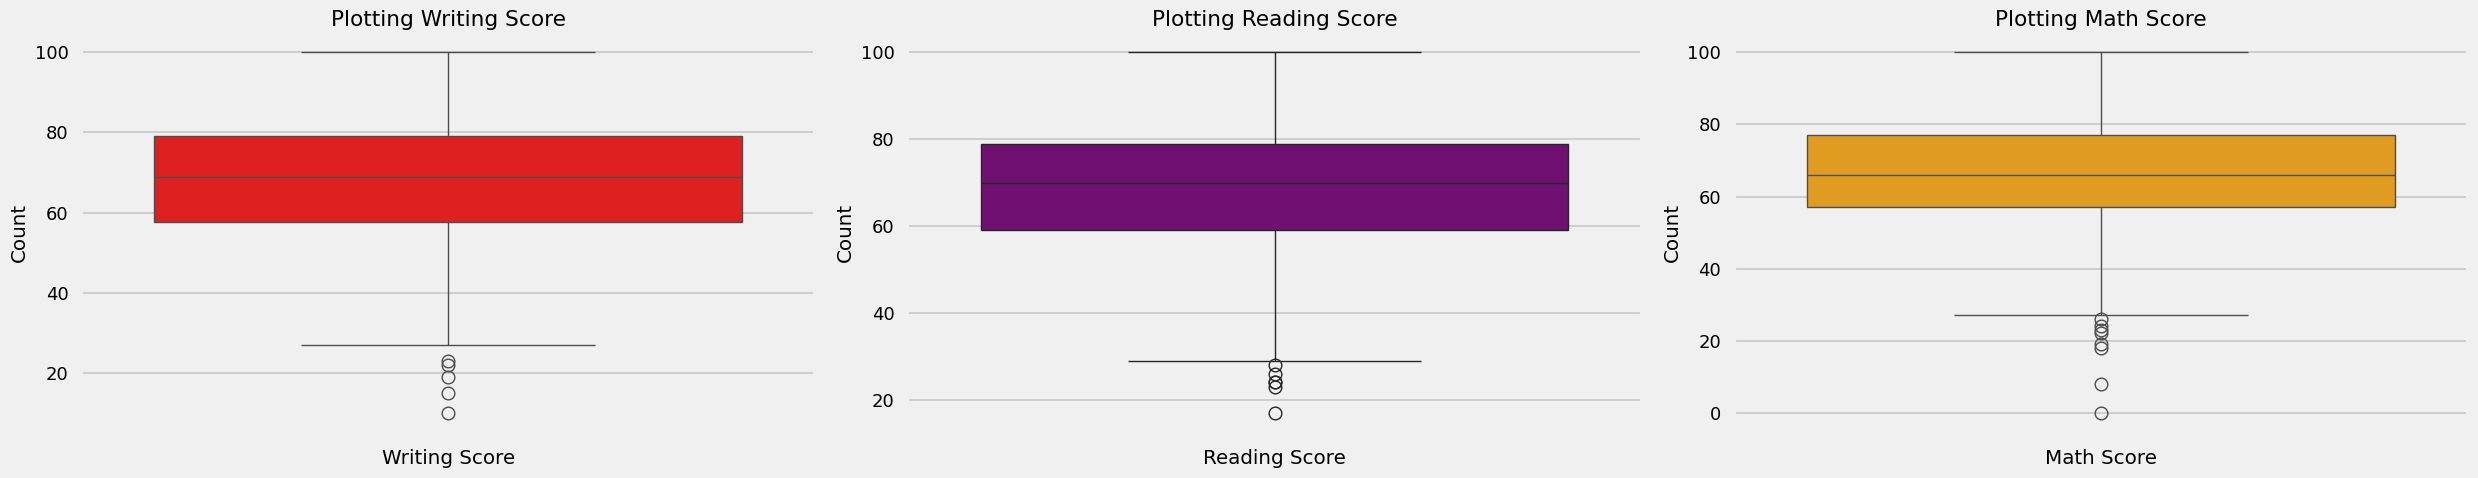

In [ ]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 3, figsize=(25, 5))

# Plotting Writing Score
sns.boxplot(y=df['writing score'], ax=axs[0],color="red")
axs[0].set_title("Plotting Writing Score")
axs[0].set_xlabel("Writing Score")
axs[0].set_ylabel("Count")

# Plotting Reading Score
sns.boxplot(y=df['reading score'], ax=axs[1], color="purple")
axs[1].set_title("Plotting Reading Score")
axs[1].set_xlabel("Reading Score")
axs[1].set_ylabel("Count")

# Plotting Math Score
sns.boxplot(y=df['math score'], ax=axs[2], color="orange")
axs[2].set_title("Plotting Math Score")
axs[2].set_xlabel("Math Score")
axs[2].set_ylabel("Count")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


### Insight :
The box plots show that most students scored between 63-82 in writing, 72-88 in reading, and 64-80 in math, with several outliers scoring lower than the majority in all subjects

## Removing outliers

The following options are available for treatment:

Remove them: Removing the records is not recommended as these are valid students and should be included in the analysis.

Replace them with mean or median : Mean is sensitive to outliers. It is better to use the median for scores.

Replace them with gender wise median: Test scores may vary based on gender. For example, the median math score for female students can be different from the median math score for male students. It is better to use gender-wise median scores for replacement.

In [ ]:
# Calculate the gender-wise median math score
gender_wise_math_median = df.groupby('gender')['math score'].median()
gender_wise_math_median

,math score
gender,
female,65.0
male,69.0


###Standard deviation will be used to detect outliers. A common practice is to treat anything that is +/- 3 standard deviations from the mean as an outlier.

In [ ]:
# Calculate the mean of math scores
math_score_mean = df['math score'].mean()


# Calculate the median of math scores
math_score_median = df['math score'].median()


# Calculate the mode of math scores
math_score_mode = st.mode(df['math score'])


# Calculate the standard deviation of math scores
math_score_std = df['math score'].std()


# Calculate the minimum math score
math_score_min = df['math score'].min()

# Calculate the maximum math score
math_score_max = df['math score'].max()

# Calculate Q1 and Q3 using the mean and standard deviation
Q1 = math_score_mean - 3 * math_score_std  # First quartile (Q1) assuming normal distribution
Q3 = math_score_mean + 3 * math_score_std  # Third quartile (Q3) assuming normal distribution
print(Q1, Q3)  # Output Q1 and Q3 values


20.59975971197165 111.57824028802835


In [ ]:
# Filter the DataFrame to find students with math scores outside the range defined by Q1 and Q3
df[(df['math score'] < Q1) | (df['math score'] > Q3)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
17,female,group B,some high school,free/reduced,none,18,32,28
59,female,group C,some high school,free/reduced,none,0,17,10
787,female,group B,some college,standard,none,19,38,32
980,female,group B,high school,free/reduced,none,8,24,23


In [ ]:
# Replace math scores that are below Q1 with the gender-wise median math score
df['math score'] = df.apply(lambda x :gender_wise_math_median[x['gender']] if x['math score'] < Q1 else x['math score'], axis = 1)

In [ ]:
df[(df['math score'] < Q1)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score


In [ ]:
# Calculate the gender-wise median raeding score
gender_wise_reading_median = df.groupby('gender')['reading score'].median()
gender_wise_reading_median

,reading score
gender,
female,73.0
male,66.0


In [ ]:
# Calculate the mean of reading scores
reading_score_mean = df['reading score'].mean()

# Calculate the median of reading scores
reading_score_median = df['reading score'].median()

# Calculate the mode of reading scores
reading_score_mode = st.mode(df['reading score'])

# Calculate the standard deviation of reading scores
reading_score_std = df['reading score'].std()

# Calculate the minimum reading score
reading_score_min = df['reading score'].min()

# Calculate the maximum reading score
reading_score_max = df['reading score'].max()

# Calculate Q1 and Q3 using the mean and standard deviation
Q1 = reading_score_mean - 3 * reading_score_std  # First quartile (Q1) assuming normal distribution
Q3 = reading_score_mean + 3 * reading_score_std  # Third quartile (Q3) assuming normal distribution
print(Q1, Q3)  # Output Q1 and Q3 values


25.368424188243353 112.96957581175664


In [ ]:
# Filter the DataFrame to find students with reading scores outside the range defined by Q1 and Q3
df[(df['reading score'] < Q1) | (df['reading score'] > Q3)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,65.0,17,10
327,male,group A,some college,free/reduced,none,28.0,23,19
596,male,group B,high school,free/reduced,none,30.0,24,15
980,female,group B,high school,free/reduced,none,65.0,24,23


In [ ]:
# Replace reading scores that are below Q1 with the gender-wise median reading score
df['reading score'] = df.apply(lambda x :gender_wise_reading_median [x['gender']] if x['reading score'] < Q1 else x['reading score'], axis = 1)

In [ ]:
# Calculate the gender-wise median writing score
gender_wise_writing_median = df.groupby('gender')['writing score'].median()
gender_wise_writing_median

,writing score
gender,
female,74.0
male,64.0


In [ ]:
# Calculate the mean of writing scores
writing_score_mean = df['writing score'].mean()

# Calculate the median of writing scores
writing_score_median = df['writing score'].median()

# Calculate the mode of writing scores
writing_score_mode = st.mode(df['writing score'])

# Calculate the standard deviation of writing scores
writing_score_std = df['writing score'].std()

# Calculate the minimum writing score
writing_score_min = df['writing score'].min()

# Calculate the maximum writing score
writing_score_max = df['writing score'].max()

# Calculate Q1 and Q3 using the mean and standard deviation
Q1 = writing_score_mean - 3 * writing_score_std  # First quartile (Q1) assuming normal distribution
Q3 = writing_score_mean + 3 * writing_score_std  # Third quartile (Q3) assuming normal distribution
print(Q1, Q3)  # Output Q1 and Q3 values


22.46702896739105 113.64097103260895


In [ ]:
# Filter the DataFrame to find students with writing scores outside the range defined by Q1 and Q3
df[(df['writing score'] < Q1) | (df['writing score'] > Q3)]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,65.0,73.0,10
76,male,group E,some high school,standard,none,30.0,26.0,22
327,male,group A,some college,free/reduced,none,28.0,66.0,19
596,male,group B,high school,free/reduced,none,30.0,66.0,15


In [ ]:
# Replace writing scores that are below Q1 with the gender-wise median writing score
df['writing score'] = df.apply(lambda x :gender_wise_reading_median [x['gender']] if x['writing score'] < Q1 else x['writing score'], axis = 1)

In [ ]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.30400,69.359000,68.259000
std,14.75104,14.291129,14.838467
min,22.00000,26.000000,23.000000
25%,57.00000,59.750000,58.000000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


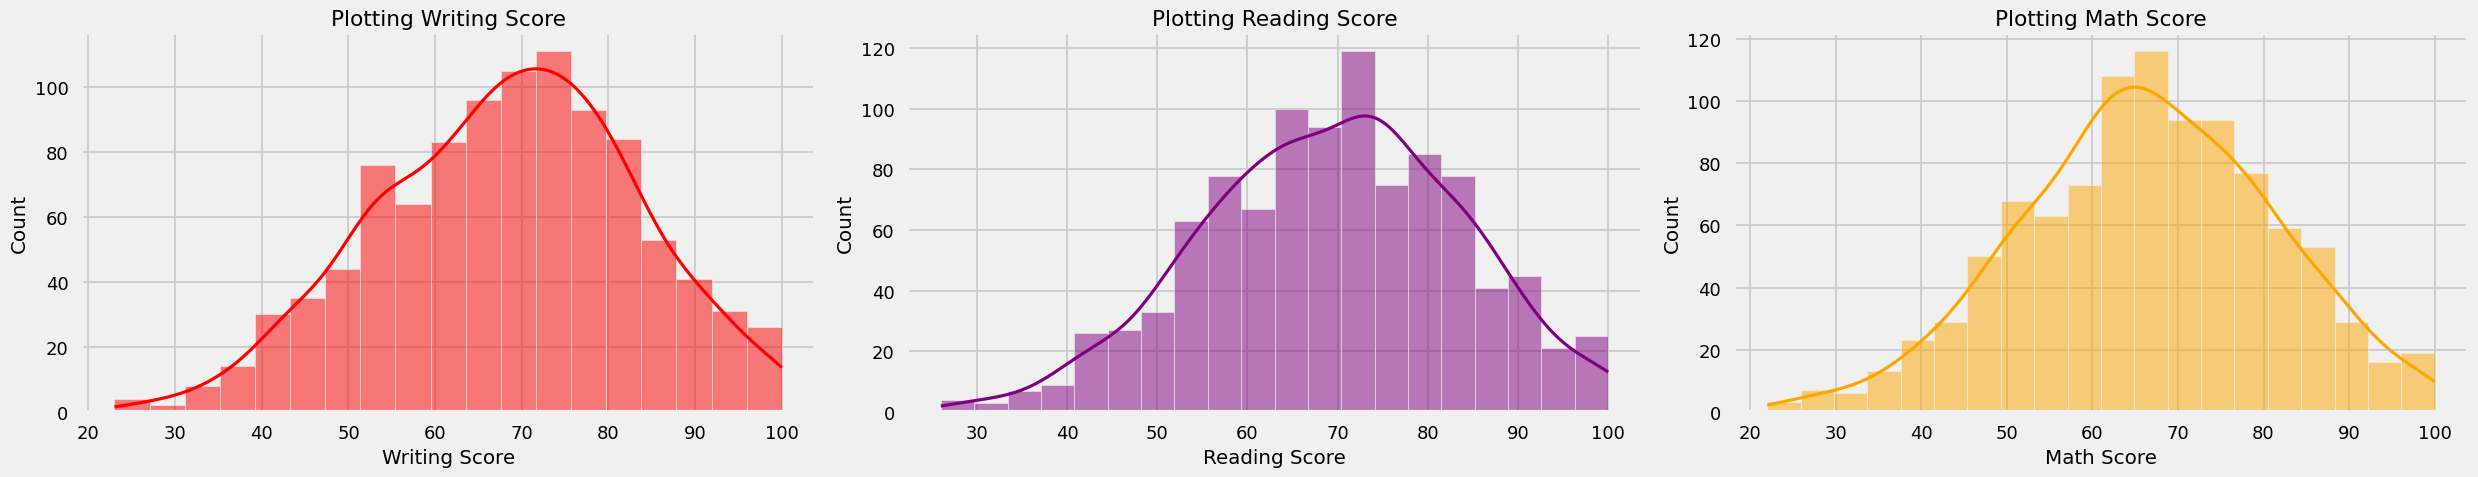

In [ ]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 3, figsize=(25, 5))

# Plotting Writing Score
sns.histplot(df['writing score'], kde=True, color="Red", ax=axs[0])
axs[0].set_title("Plotting Writing Score")
axs[0].set_xlabel("Writing Score")
axs[0].set_ylabel("Count")

# Plotting Reading Score
sns.histplot(df['reading score'], kde=True, color="purple", ax=axs[1])
axs[1].set_title("Plotting Reading Score")
axs[1].set_xlabel("Reading Score")
axs[1].set_ylabel("Count")

# Plotting Math Score
sns.histplot(df['math score'], kde=True, color='Orange', ax=axs[2])
axs[2].set_title("Plotting Math Score")
axs[2].set_xlabel("Math Score")
axs[2].set_ylabel("Count")

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### Insight :
The histograms show that writing, reading, and math scores are approximately normally distributed with most students scoring between 60 and 80, indicating a slight left skew in each subject.

## checking numerical and categorical fields

In [ ]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('{} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\n{} categorical features : {}'.format(len(categorical_features), categorical_features))

3 numerical features : ['math score', 'reading score', 'writing score']

5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


## Score distribution of students in all three subjects

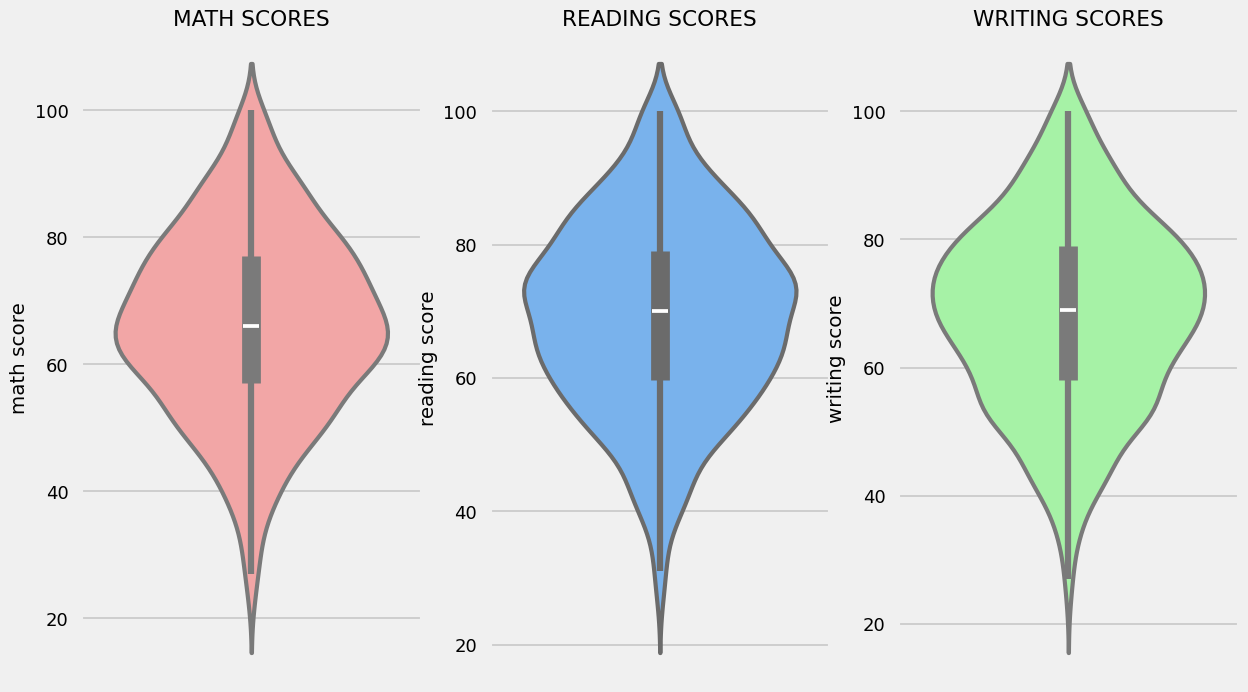

In [ ]:
# Set the figure size for the subplots
plt.figure(figsize=(18, 8))

# Create the first subplot for math scores
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')  # Set the title for the first subplot
sns.violinplot(y='math score', data=df, color='#FF9999', linewidth=3)  # Plot the violin plot for math scores

# Create the second subplot for reading scores
plt.subplot(1, 4, 2)
plt.title('READING SCORES')  # Set the title for the second subplot
sns.violinplot(y='reading score', data=df, color='#66B2FF', linewidth=3)  # Plot the violin plot for reading scores

# Create the third subplot for writing scores
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')  # Set the title for the third subplot
sns.violinplot(y='writing score', data=df, color='#99FF99', linewidth=3)  # Plot the violin plot for writing scores

# Display the plots
plt.show()


### Insight :  
From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

## Univariate Analysis

### Distribution of Gender

<ipython-input-278-fa2aec7f858f>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['gender'], data=df, palette='pastel', ax=ax[0], saturation=0.95)


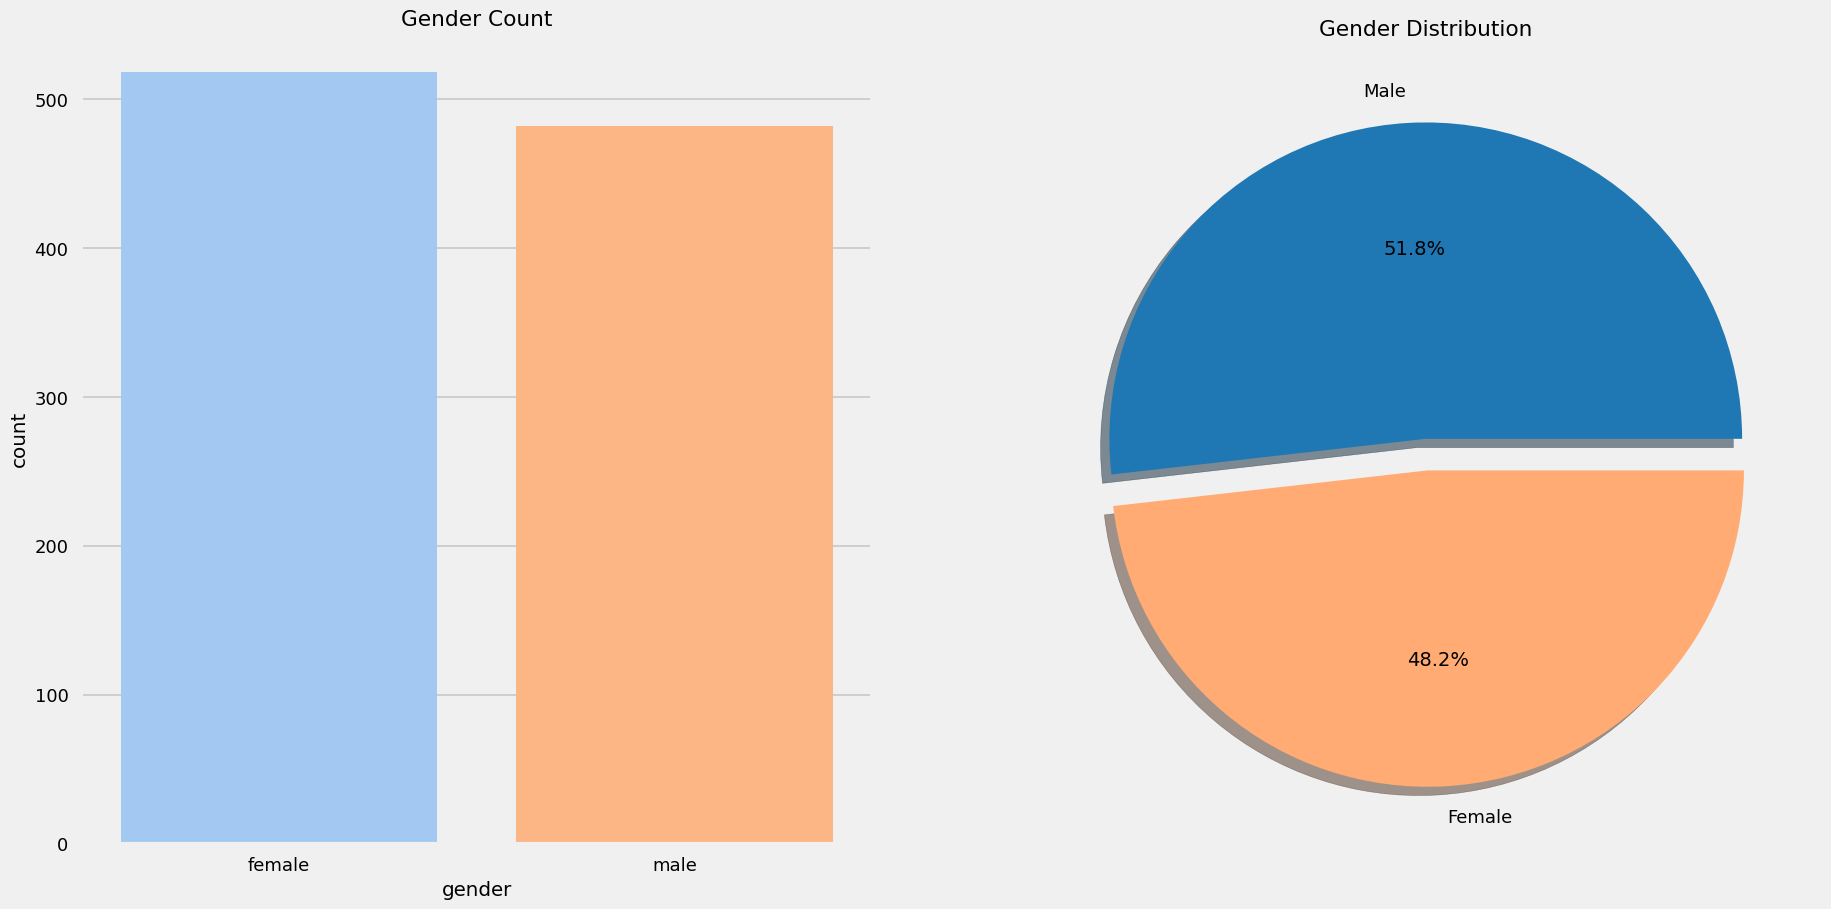

In [ ]:
# Create a subplot with 1 row and 2 columns, setting the figure size
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot the count of students by gender using a countplot in the first subplot
sns.countplot(x=df['gender'], data=df, palette='pastel', ax=ax[0], saturation=0.95)
# Set the title for the first subplot
ax[0].set_title('Gender Count')

# Plot the distribution of gender using a pie chart in the second subplot
plt.subplot(1, 2, 2)  # Specify the second subplot
plt.pie(x=df['gender'].value_counts(), labels=['Male', 'Female'], explode=[0, 0.1], autopct='%1.1f%%', shadow=True, colors=['#1f77b4', '#ffab73'])
# Set the title for the pie chart
plt.title('Gender Distribution')

# Display the plots
plt.show()


#### Insights

Gender has balanced data with female students are 518 (48.2%) and male students are 482 (51.8%)

### Group wise Distribution

<ipython-input-281-b5acfb4227f7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['race/ethnicity'], data=df, palette='deep', ax=ax[0], saturation=0.95)


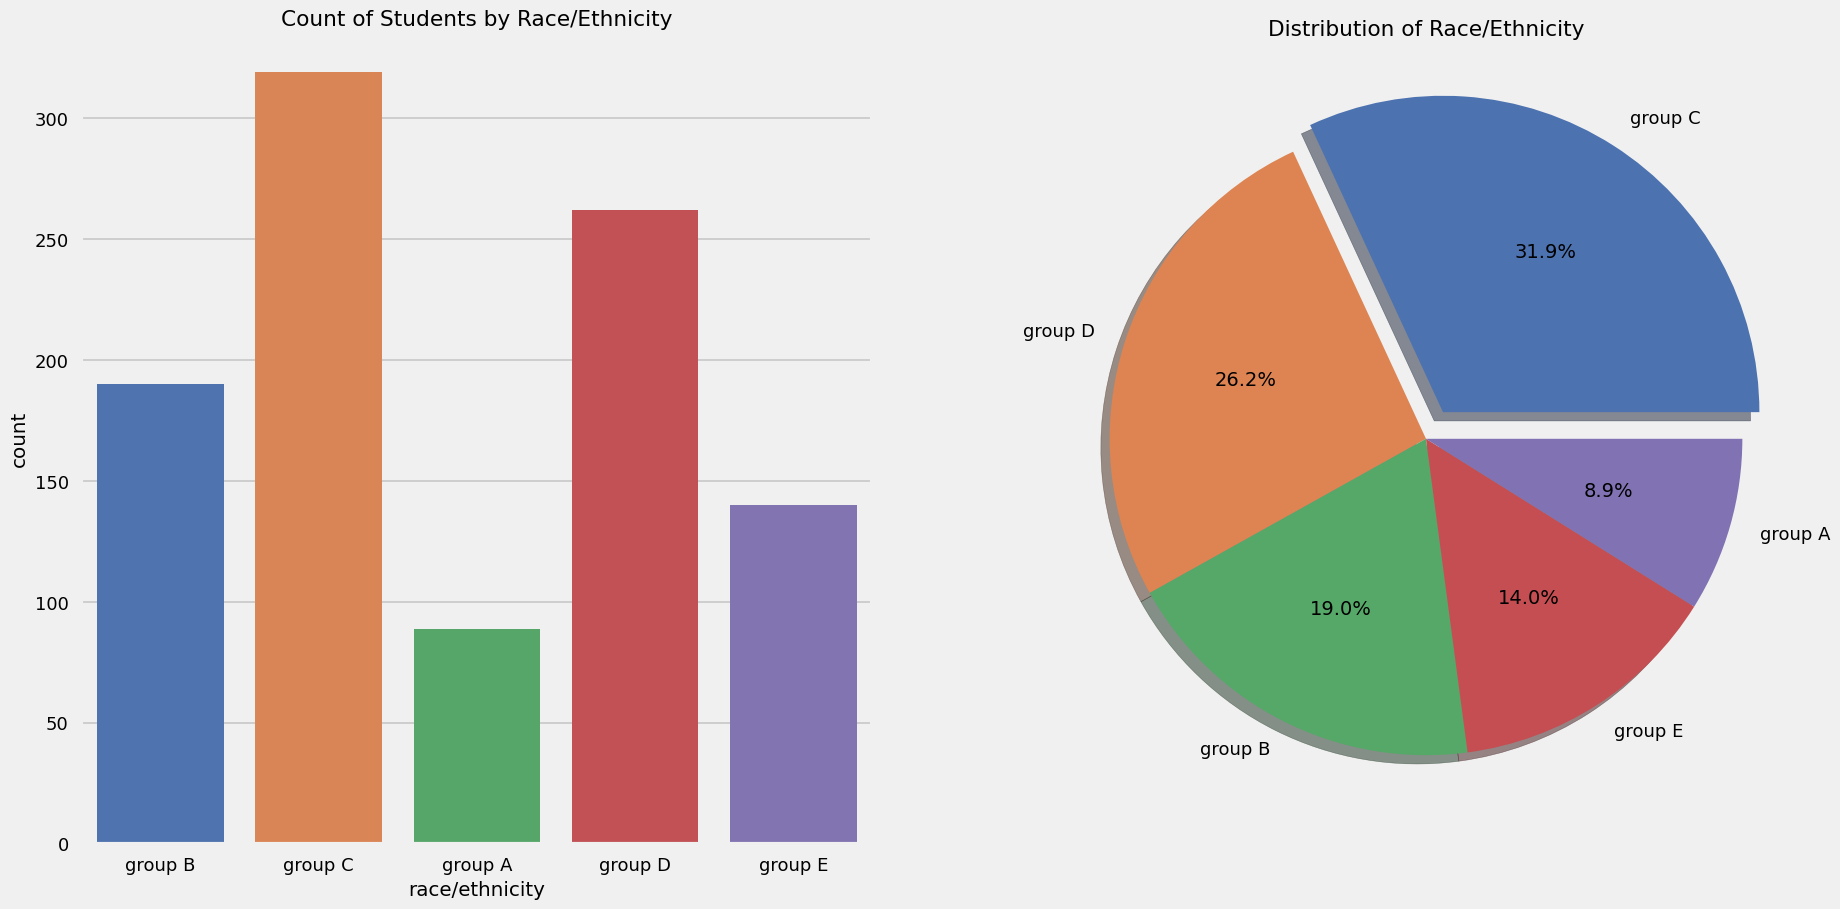

In [ ]:
# Create a subplot with 1 row and 2 columns, setting the figure size
f, ax = plt.subplots(1, 2, figsize=(20, 10))

# Plot the count of students by race/ethnicity using a countplot in the first subplot
sns.countplot(x=df['race/ethnicity'], data=df, palette='deep', ax=ax[0], saturation=0.95)
# Set the title for the first subplot
ax[0].set_title('Count of Students by Race/Ethnicity')

# Plot the distribution of race/ethnicity using a pie chart in the second subplot
plt.subplot(1, 2, 2)  # Specify the second subplot
plt.pie(x=df['race/ethnicity'].value_counts(), labels=df['race/ethnicity'].value_counts().index, explode=[0.1, 0, 0, 0, 0], autopct='%1.1f%%', shadow=True, colors=sns.color_palette('deep', len(df['race/ethnicity'].value_counts()))  # Apply the same 'deep' palette
)
# Set the title for the pie chart
plt.title('Distribution of Race/Ethnicity')

# Display the plots
plt.show()


#### Insights :
The bar and pie charts show that group C has the highest representation among students, followed by groups D, B, E, and A, indicating group C constitutes the largest proportion of the dataset and A constitutes the smallest proportion of the dataset.

### Educational background of student's parent

<ipython-input-282-a45459e00a84>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['parental level of education'], palette='Purples')


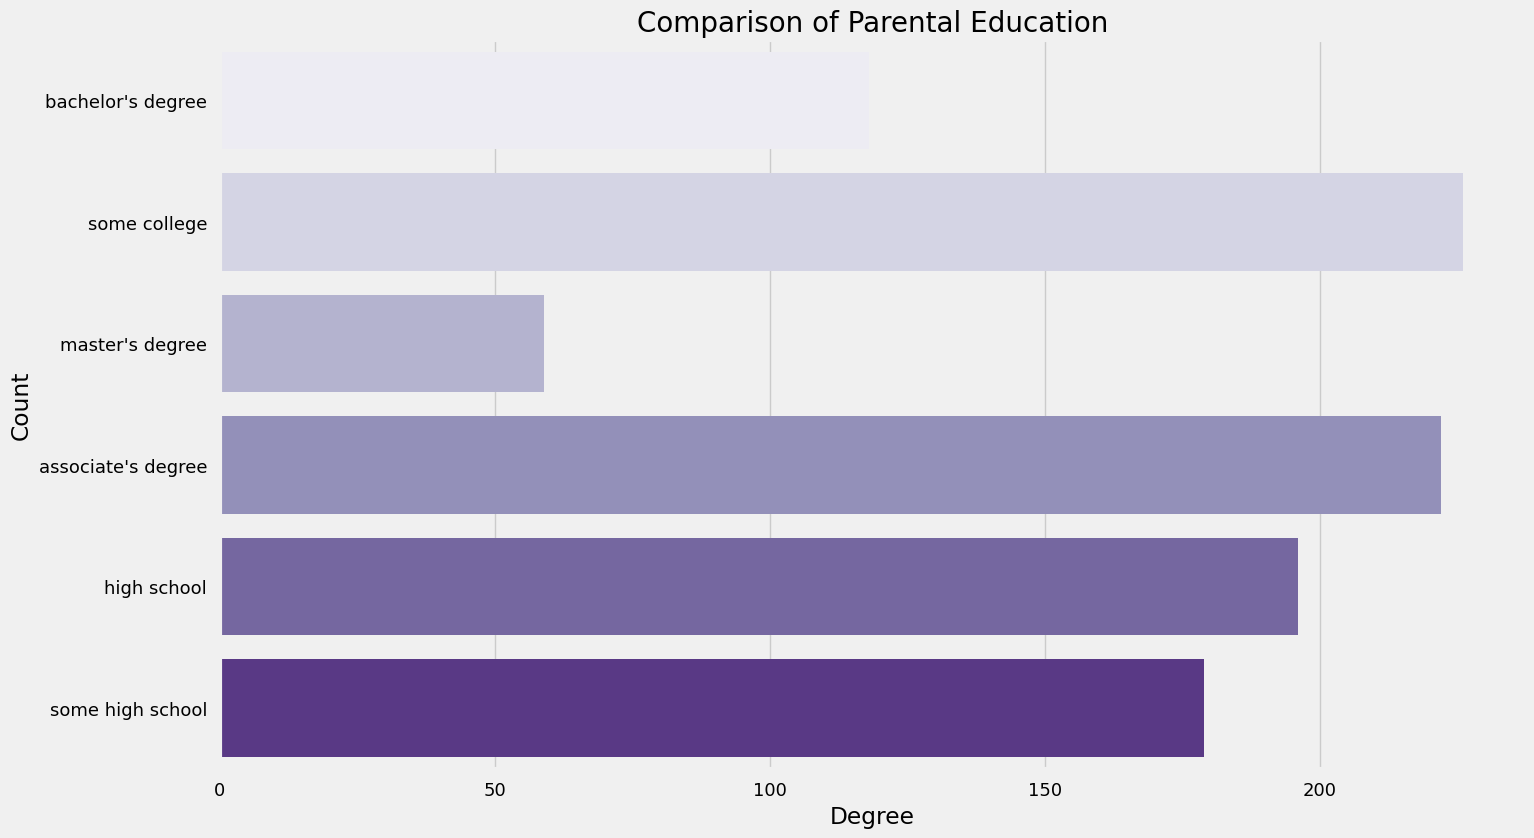

In [ ]:
# Set the figure size for the plot
plt.rcParams['figure.figsize'] = (15, 9)

# Use the 'fivethirtyeight' style for the plot
plt.style.use('fivethirtyeight')

# Plot the count of students by parental level of education using a countplot
sns.countplot(df['parental level of education'], palette='Purples')

# Set the title for the plot
plt.title('Comparison of Parental Education', fontweight=30, fontsize=20)

# Set the label for the x-axis
plt.xlabel('Degree')

# Set the label for the y-axis
plt.ylabel('Count')

# Display the plot
plt.show()


#### Insight :
The bar plot shows that most parents have some college or high school education, with bachelor's degrees and some high school being the next most common, while master's degrees are the least common among the parental education levels.








### Most common lunch type among students

<ipython-input-283-6008952bb43d>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-talk')
<ipython-input-283-6008952bb43d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(df['lunch'], palette='coolwarm')


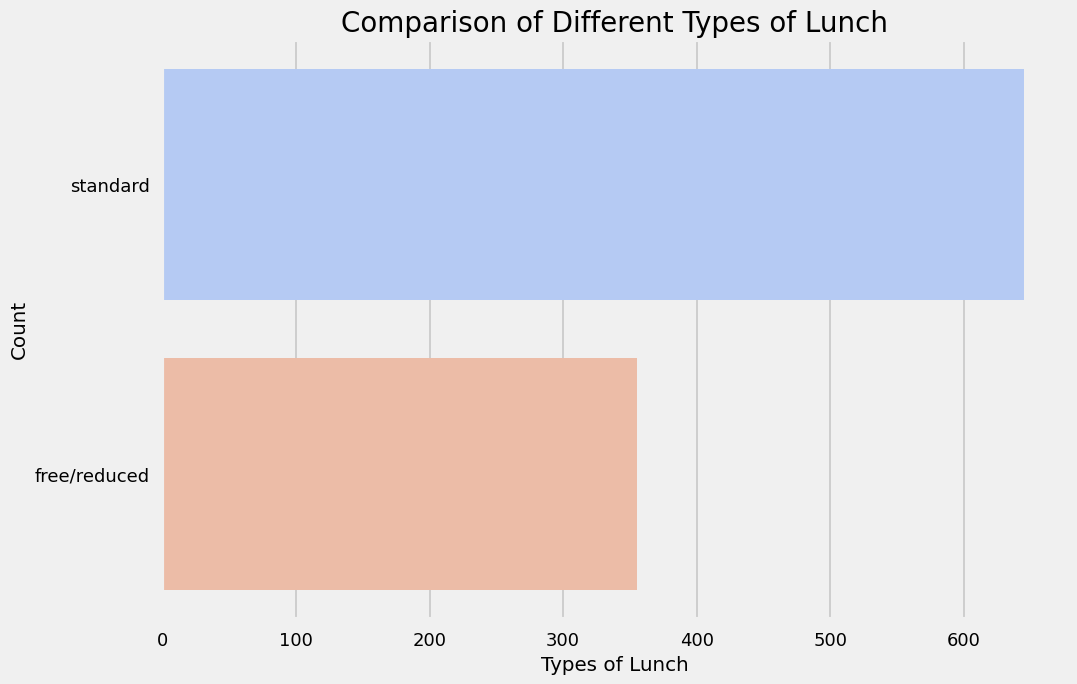

In [ ]:
# Set the figure size for the plot
plt.rcParams['figure.figsize'] = (15, 9)

# Use the 'seaborn-talk' style for the plot
plt.style.use('seaborn-talk')

# Plot the count of students by lunch type using a countplot
sns.countplot(df['lunch'], palette='coolwarm')

# Set the title for the plot
plt.title('Comparison of Different Types of Lunch', fontweight=30, fontsize=20)

# Set the label for the x-axis
plt.xlabel('Types of Lunch')

# Set the label for the y-axis
plt.ylabel('Count')

# Display the plot
plt.show()


#### Insight :
The bar chart shows that a majority of students receive standard lunch, while a smaller but significant portion receives free or reduced lunch, indicating a notable difference in the lunch type distribution.

## Bivariate Analysis

### Gender impact on student's performance

In [ ]:
# adding average column
df['total score'] = df['math score'] + df['reading score'] + df['writing score']
df['average'] = df['total score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total score,average
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0,218.0,72.666667
1,female,group C,some college,standard,completed,69.0,90.0,88.0,247.0,82.333333
2,female,group B,master's degree,standard,none,90.0,95.0,93.0,278.0,92.666667
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0,148.0,49.333333
4,male,group C,some college,standard,none,76.0,78.0,75.0,229.0,76.333333


In [ ]:
reading_full = df[df['reading score'] == 100]['average'].count()
writing_full = df[df['writing score'] == 100]['average'].count()
math_full = df[df['math score'] == 100]['average'].count()

print(f'Number of students with full marks in Maths: {math_full}')
print(f'Number of students with full marks in Writing: {writing_full}')
print(f'Number of students with full marks in Reading: {reading_full}')

Number of students with full marks in Maths: 7
Number of students with full marks in Writing: 14
Number of students with full marks in Reading: 17


<ipython-input-254-913ec9aff5cd>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='math score', data=df, ax=axs[0], palette='muted')
<ipython-input-254-913ec9aff5cd>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='reading score', data=df, ax=axs[1], palette='muted')
<ipython-input-254-913ec9aff5cd>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='gender', y='writing score', data=df, ax=axs[2], palette='muted')
<ipython-input-254-913ec9aff5cd>:23: FutureWarning: 

Passing `palette` without assigning `hue` is

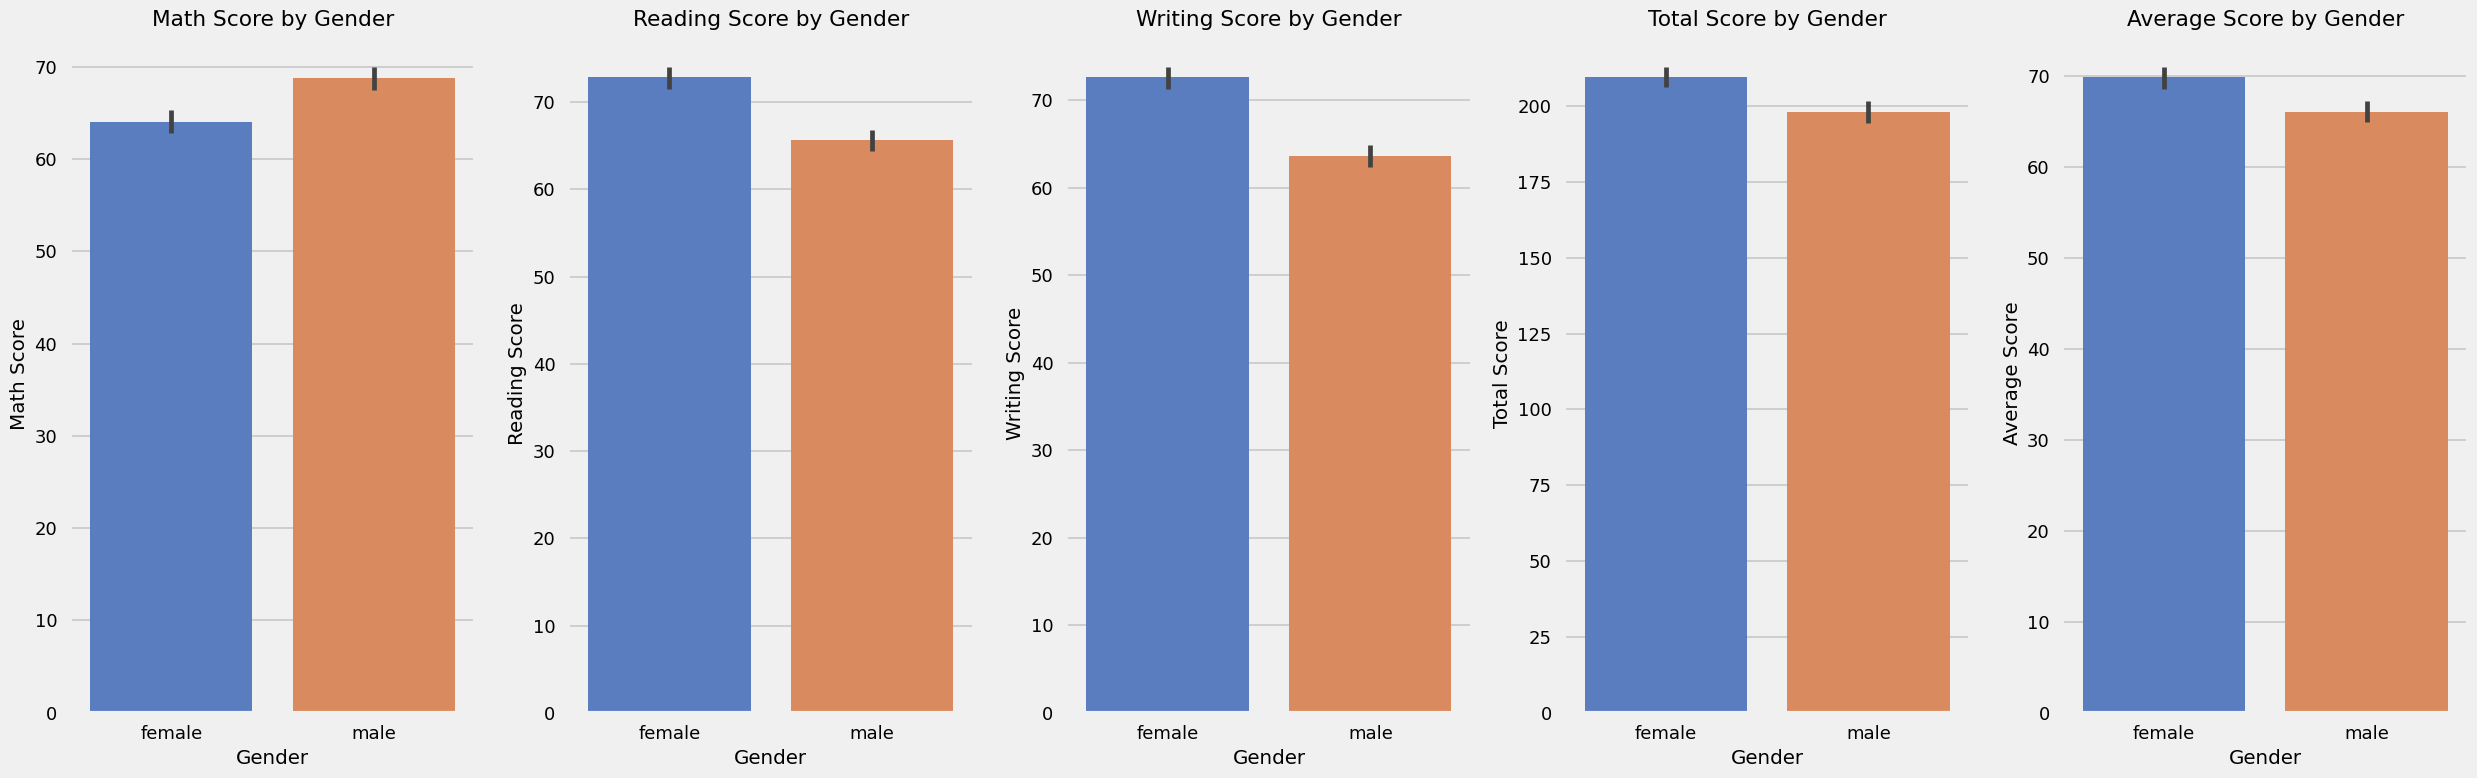

In [ ]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 5, figsize=(25, 8))

# Plotting Math Score by Gender
sns.barplot(x='gender', y='math score', data=df, ax=axs[0], palette='muted')
axs[0].set_title('Math Score by Gender')
axs[0].set_xlabel('Gender')
axs[0].set_ylabel('Math Score')

# Plotting Reading Score by Gender
sns.barplot(x='gender', y='reading score', data=df, ax=axs[1], palette='muted')
axs[1].set_title('Reading Score by Gender')
axs[1].set_xlabel('Gender')
axs[1].set_ylabel('Reading Score')

# Plotting Writing Score by Gender
sns.barplot(x='gender', y='writing score', data=df, ax=axs[2], palette='muted')
axs[2].set_title('Writing Score by Gender')
axs[2].set_xlabel('Gender')
axs[2].set_ylabel('Writing Score')

# Plotting Total Score by Gender
sns.barplot(x='gender', y='total score', data=df, ax=axs[3], palette='muted')
axs[3].set_title('Total Score by Gender')
axs[3].set_xlabel('Gender')
axs[3].set_ylabel('Total Score')

# Plotting Average Score by Gender
sns.barplot(x='gender', y='average', data=df, ax=axs[4], palette='muted')
axs[4].set_title('Average Score by Gender')
axs[4].set_xlabel('Gender')
axs[4].set_ylabel('Average Score')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


#### Insights :

Math Score by Gender: Male students have slightly higher average math scores compared to female students.

Reading Score by Gender: Female students have higher average reading scores compared to male students.

Writing Score by Gender: Female students have higher average writing scores compared to male students.

Total Score by Gender: Female students generally achieve higher total scores across all subjects compared to male students.

Average Score by Gender: Female students have higher average scores across all subjects compared to male students.

### Race/Ehnicity impact on student's performance

<ipython-input-255-695a1ec4a35a>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_data.index, y=grouped_data['math score'], palette='mako', ax=ax[0])
<ipython-input-255-695a1ec4a35a>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_data.index, y=grouped_data['reading score'], palette='flare', ax=ax[1])
<ipython-input-255-695a1ec4a35a>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=grouped_data.index, y=grouped_data['writing score'], palette='coolwarm', ax=ax[2])


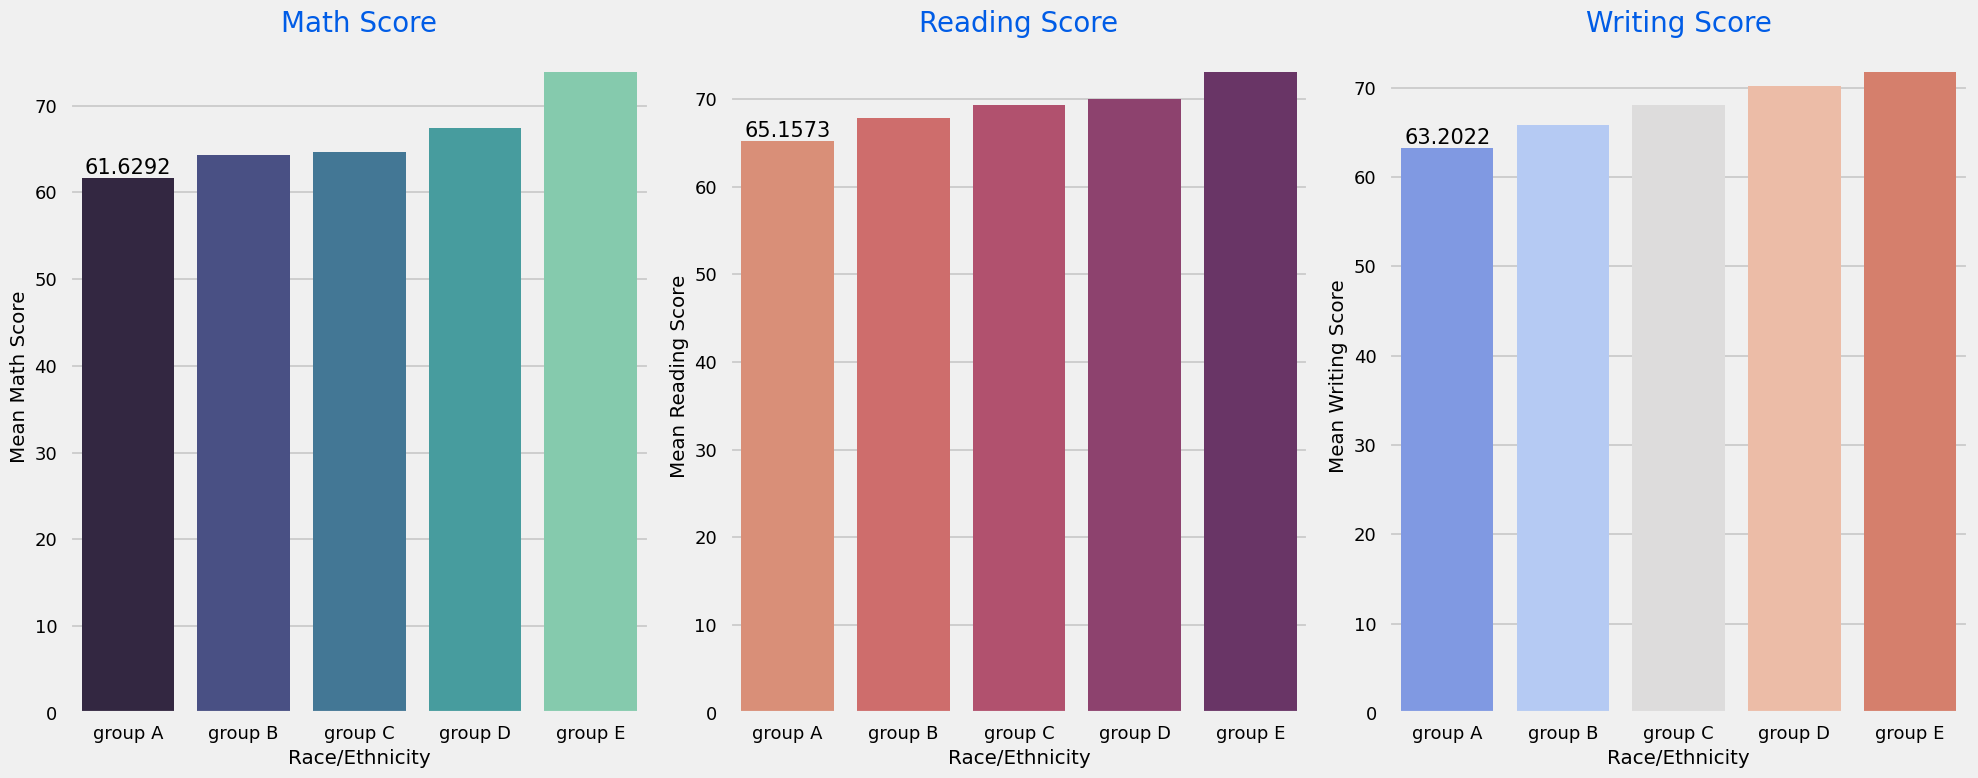

In [ ]:
grouped_data = df.groupby('race/ethnicity')[numeric_features].mean()

# Create a figure and a set of subplots
fig, ax = plt.subplots(1, 3, figsize=(20, 8))

# Plotting Math Score by Race/Ethnicity
sns.barplot(x=grouped_data.index, y=grouped_data['math score'], palette='mako', ax=ax[0])
ax[0].set_title('Math Score', color='#005ce6', size=20)
ax[0].set_xlabel('Race/Ethnicity')
ax[0].set_ylabel('Mean Math Score')
ax[0].bar_label(ax[0].containers[0], color='black', size=15)

# Plotting Reading Score by Race/Ethnicity
sns.barplot(x=grouped_data.index, y=grouped_data['reading score'], palette='flare', ax=ax[1])
ax[1].set_title('Reading Score', color='#005ce6', size=20)
ax[1].set_xlabel('Race/Ethnicity')
ax[1].set_ylabel('Mean Reading Score')
ax[1].bar_label(ax[1].containers[0], color='black', size=15)

# Plotting Writing Score by Race/Ethnicity
sns.barplot(x=grouped_data.index, y=grouped_data['writing score'], palette='coolwarm', ax=ax[2])
ax[2].set_title('Writing Score', color='#005ce6', size=20)
ax[2].set_xlabel('Race/Ethnicity')
ax[2].set_ylabel('Mean Writing Score')
ax[2].bar_label(ax[2].containers[0], color='black', size=15)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


#### Insights :
Math Score:
Group E has the highest mean math score.
Group A has the lowest mean math score.

Reading Score:
Group E has the highest mean reading score.
Group A has the lowest mean reading score.

Writing Score:
Group E has the highest mean writing score.
Group A has the lowest mean writing score.

Group E consistently scores the highest in all subjects, while Group A scores the lowest across math, reading, and writing.

 ### lunch type intake impact on student's performance

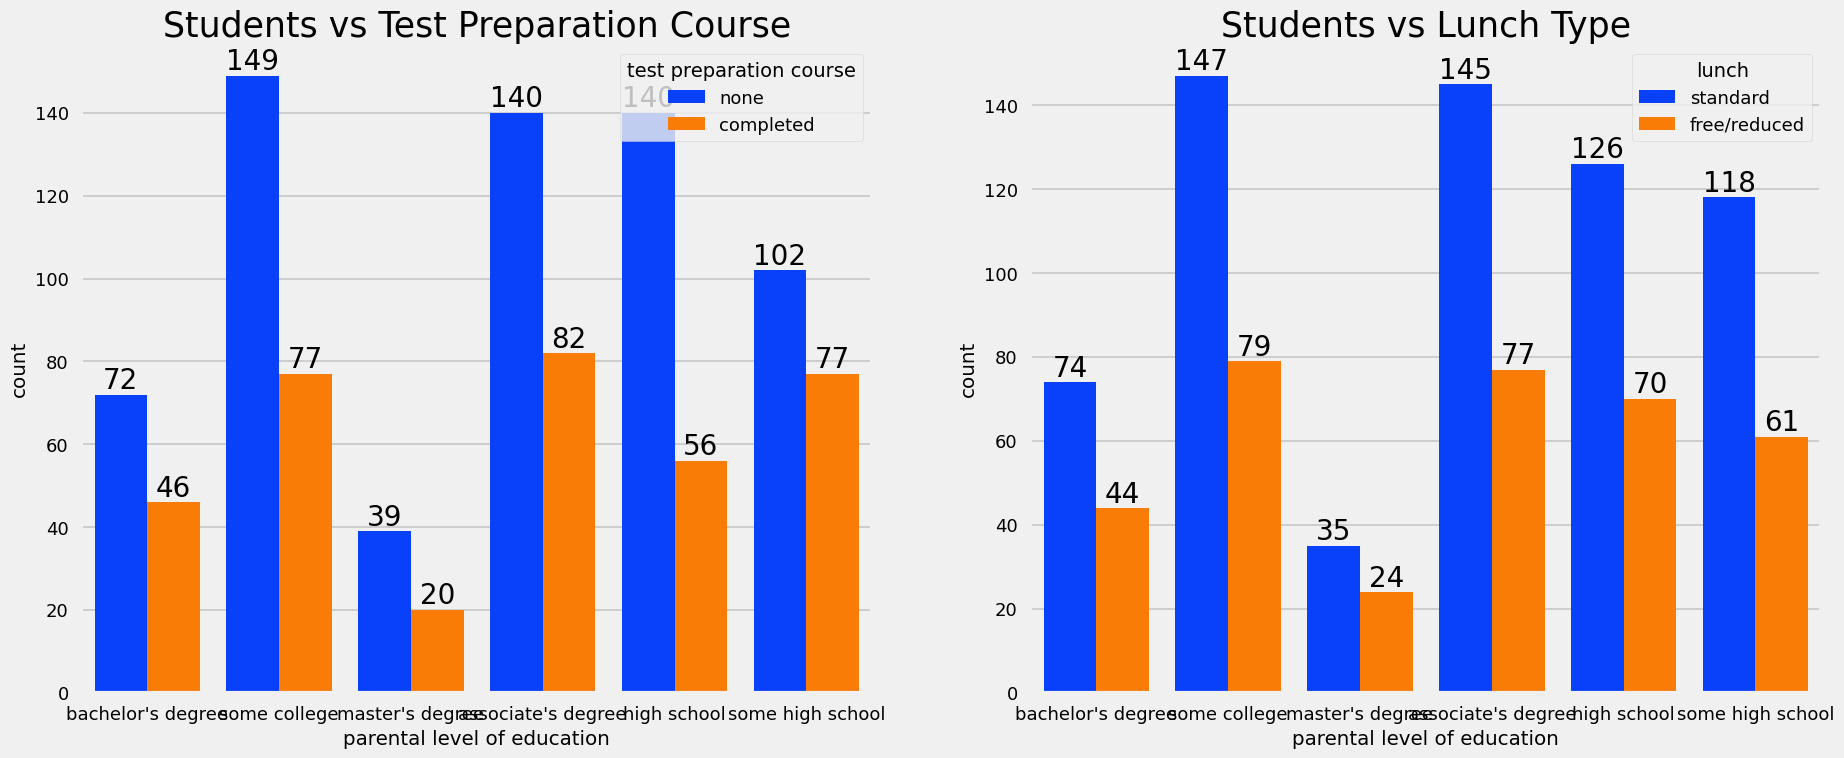

In [ ]:
# Create a subplot with 1 row and 2 columns
f, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plot the count of students by parental level of education and test preparation course
sns.countplot(x=df['parental level of education'], data=df, palette='bright', hue='test preparation course', saturation=0.95, ax=ax[0])
# Set the title for the first plot
ax[0].set_title('Students vs Test Preparation Course', color='black', size=25)
# Add labels to the bars in the first plot
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

# Plot the count of students by parental level of education and lunch type
sns.countplot(x=df['parental level of education'], data=df, palette='bright', hue='lunch', saturation=0.95, ax=ax[1])
# Set the title for the second plot
ax[1].set_title('Students vs Lunch Type', color='black', size=25)
# Add labels to the bars in the second plot
for container in ax[1].containers:
    ax[1].bar_label(container, color='black', size=20)

# Show the plots
plt.show()


#### Insights :

Test Preparation Course: Students whose parents have higher levels of education (bachelor's and master's degrees) are more likely to complete the test preparation course.

Lunch Type: Students receiving free/reduced lunch are prevalent across all levels of parental education, but students with standard lunch are more common, especially among those with parents who have higher education levels.


### Test prepration course impact on student's performance


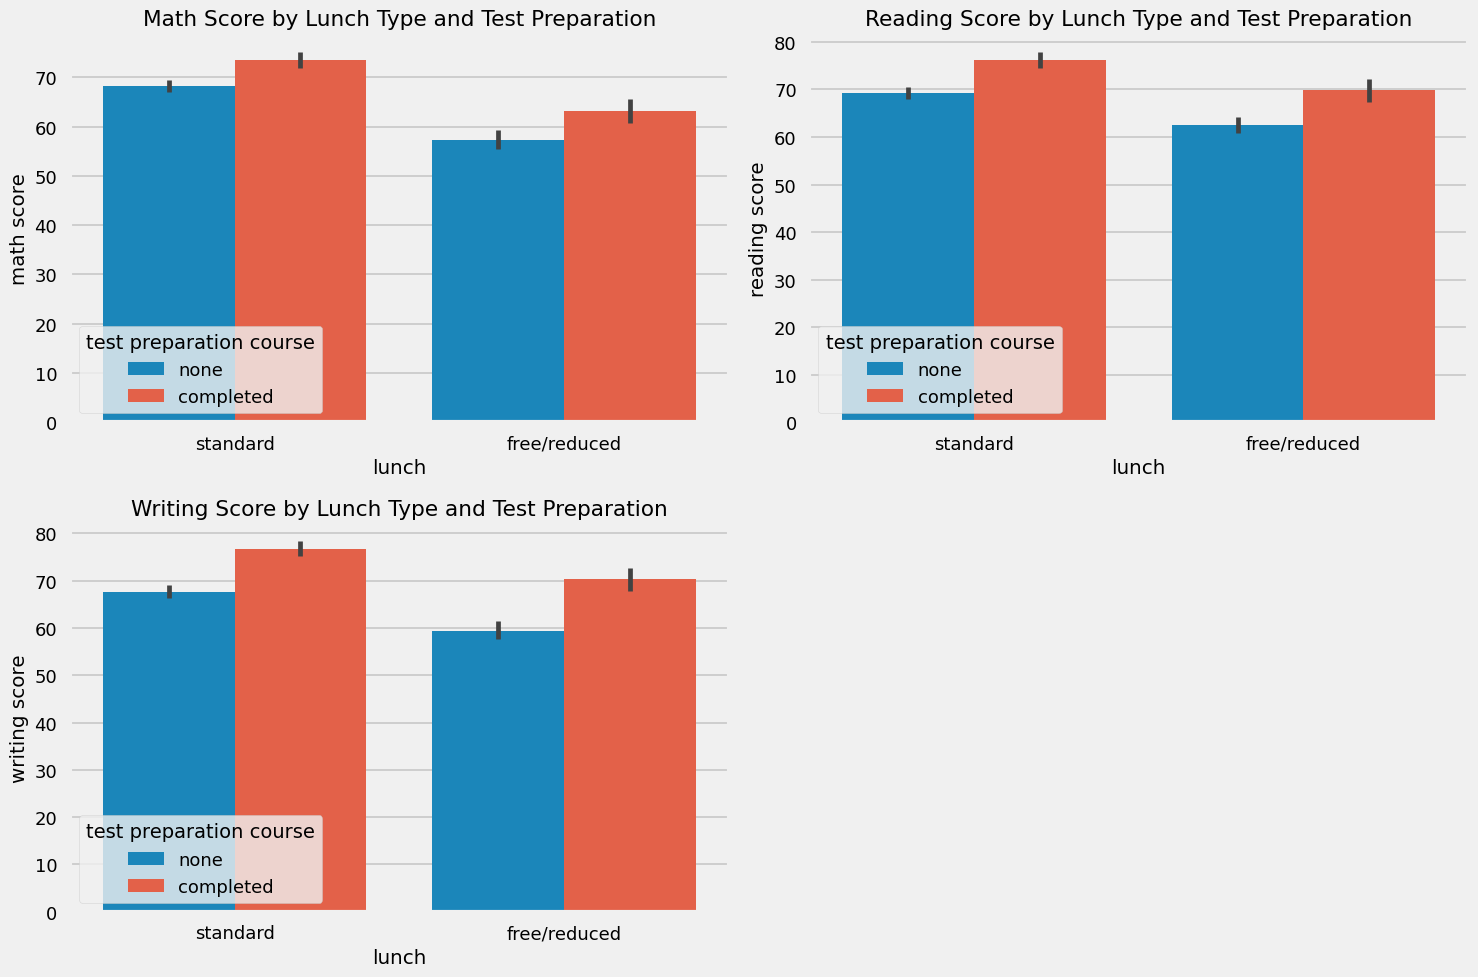

In [ ]:
# Set the figure size for the subplots
plt.figure(figsize=(15, 10))

# Create the first subplot for math scores
plt.subplot(2, 2, 1)
sns.barplot(x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.title('Math Score by Lunch Type and Test Preparation')

# Create the second subplot for reading scores
plt.subplot(2, 2, 2)
sns.barplot(x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.title('Reading Score by Lunch Type and Test Preparation')

# Create the third subplot for writing scores
plt.subplot(2, 2, 3)
sns.barplot(x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])
plt.title('Writing Score by Lunch Type and Test Preparation')

# Display the plots
plt.tight_layout()  # Adjust subplots to fit into figure area.
plt.show()


#### Insights :
Math Scores: Students who completed the test preparation course generally scored higher in math regardless of lunch type. Students with standard lunch scored slightly higher than those with free/reduced lunch.

Reading Scores: Completing the test preparation course is associated with higher reading scores for both lunch types. Students with standard lunch who completed the course have the highest reading scores.

Writing Scores: Similar to math and reading, students who completed the test preparation course scored higher in writing. Students with standard lunch also scored slightly higher than those with free/reduced lunch.

##  Multivariate Analysis

### Using Pairplot

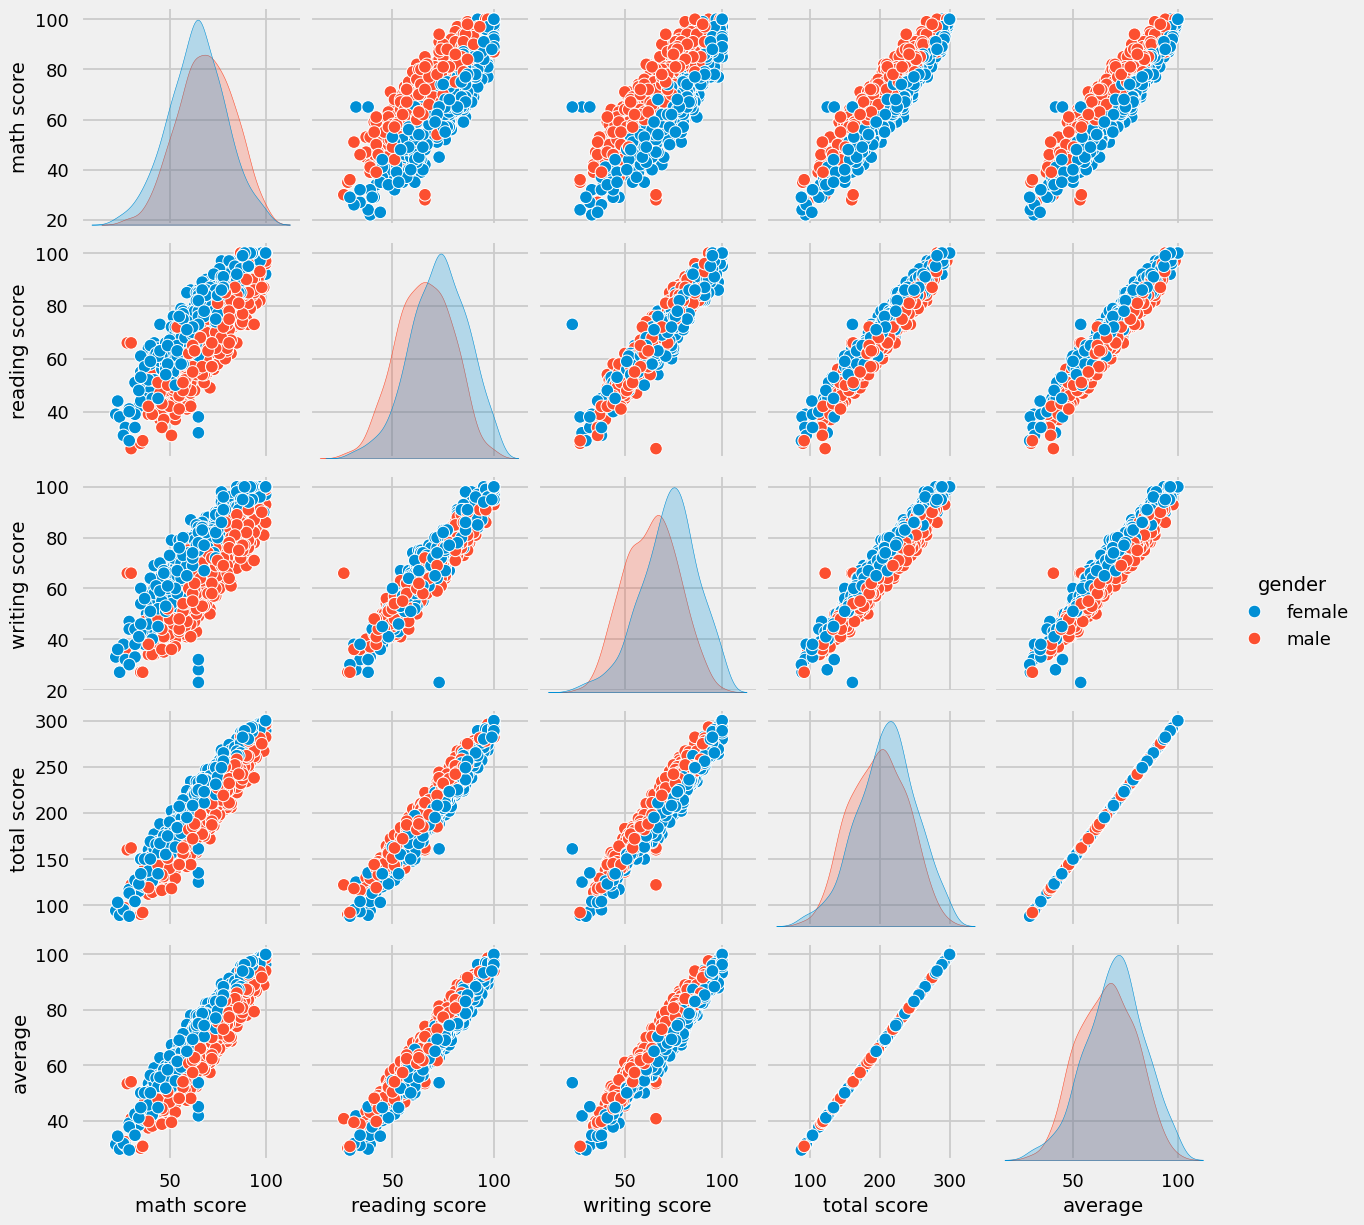

In [ ]:
# Create a pairplot of the DataFrame, colored by gender
sns.pairplot(df, hue='gender')

# Display the plot
plt.show()


#### Insights :
The pairplot reveals that all the scores (math, reading, writing, total, and average) are positively correlated with each other, indicating that students who perform well in one subject tend to perform well in others. Additionally, there is no significant difference in the score distributions between genders.

### Using Pieplot

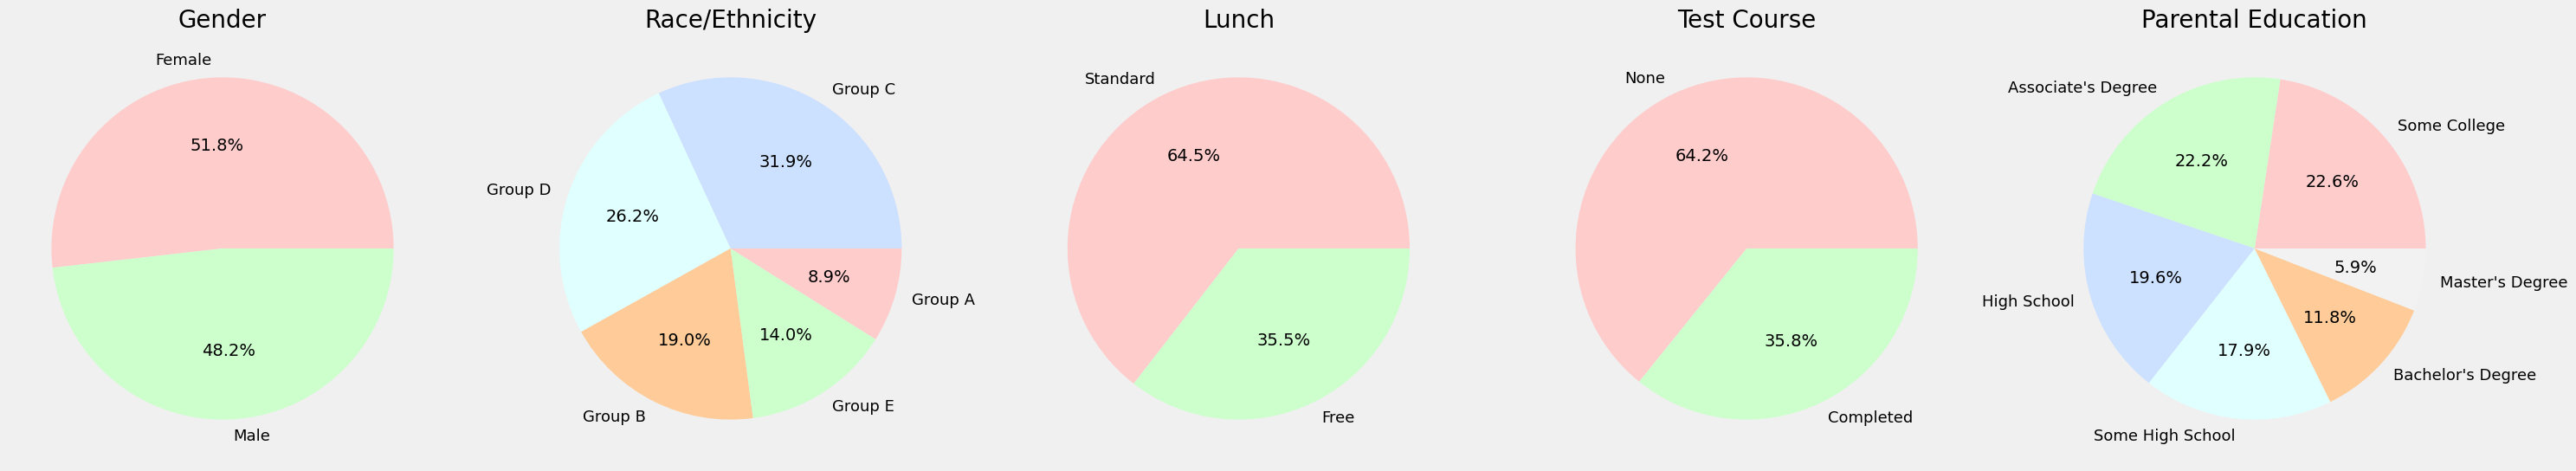

In [ ]:
# Set the figure size for the subplots
plt.rcParams['figure.figsize'] = (30, 12)

# Create the first subplot for gender distribution
plt.subplot(1, 5, 1)
size = df['gender'].value_counts()  # Get the count of each gender
labels = 'Female', 'Male'  # Labels for the pie chart
color = ['#ffcccc', '#ccffcc']  # Light colors for the pie chart

# Plot the pie chart for gender
plt.pie(size, colors=color, labels=labels, autopct='%1.1f%%')
plt.title('Gender', fontsize=20)  # Set the title
plt.axis('off')  # Turn off the axis

# Create the second subplot for race/ethnicity distribution
plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()  # Get the count of each race/ethnicity
labels = 'Group C', 'Group D', 'Group B', 'Group E', 'Group A'  # Labels for the pie chart
color = ['#cce0ff', '#e0ffff', '#ffcc99', '#ccffcc', '#ffcccc']  # Light colors for the pie chart

# Plot the pie chart for race/ethnicity
plt.pie(size, colors=color, labels=labels, autopct='%1.1f%%')
plt.title('Race/Ethnicity', fontsize=20)  # Set the title
plt.axis('off')  # Turn off the axis

# Create the third subplot for lunch distribution
plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()  # Get the count of each lunch type
labels = 'Standard', 'Free'  # Labels for the pie chart
color = ['#ffcccc', '#ccffcc']  # Light colors for the pie chart

# Plot the pie chart for lunch
plt.pie(size, colors=color, labels=labels, autopct='%1.1f%%')
plt.title('Lunch', fontsize=20)  # Set the title
plt.axis('off')  # Turn off the axis

# Create the fourth subplot for test preparation course distribution
plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()  # Get the count of each test preparation course
labels = 'None', 'Completed'  # Labels for the pie chart
color = ['#ffcccc', '#ccffcc']  # Light colors for the pie chart

# Plot the pie chart for test preparation course
plt.pie(size, colors=color, labels=labels, autopct='%1.1f%%')
plt.title('Test Course', fontsize=20)  # Set the title
plt.axis('off')  # Turn off the axis

# Create the fifth subplot for parental education distribution
plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()  # Get the count of each parental education level
labels = 'Some College', "Associate's Degree", 'High School', 'Some High School', "Bachelor's Degree", "Master's Degree"  # Labels for the pie chart
color = ['#ffcccc', '#ccffcc', '#cce0ff', '#e0ffff', '#ffcc99', '#f2f2f2']  # Light colors for the pie chart

# Plot the pie chart for parental education
plt.pie(size, colors=color, labels=labels, autopct='%1.1f%%')
plt.title('Parental Education', fontsize=20)  # Set the title
plt.axis('off')  # Turn off the axis

# Adjust the layout to prevent overlap
plt.tight_layout()

# Display the plots
plt.show()

####  Insights :
Gender: The dataset has a slightly higher percentage of female students (51.8%) compared to male students (48.2%).

Race/Ethnicity: Group C is the largest ethnic group (31.9%), followed by Group D (26.2%), Group B (19%), Group E (14%), and Group A (8.9%).

Lunch: A majority of students have standard lunch (64.5%), while 35.5% have free/reduced lunch.

Test Preparation Course: Most students did not complete the test preparation course (64.2%), while 35.8% completed it.

Parental Education: The most common parental education levels are some college (22.6%) and associate's degree (22.2%), followed by high school (19.6%), some high school (17.9%), bachelor's degree (11.8%), and master's degree (5.9%).


## Visualize average score distribution to make  conclusion.

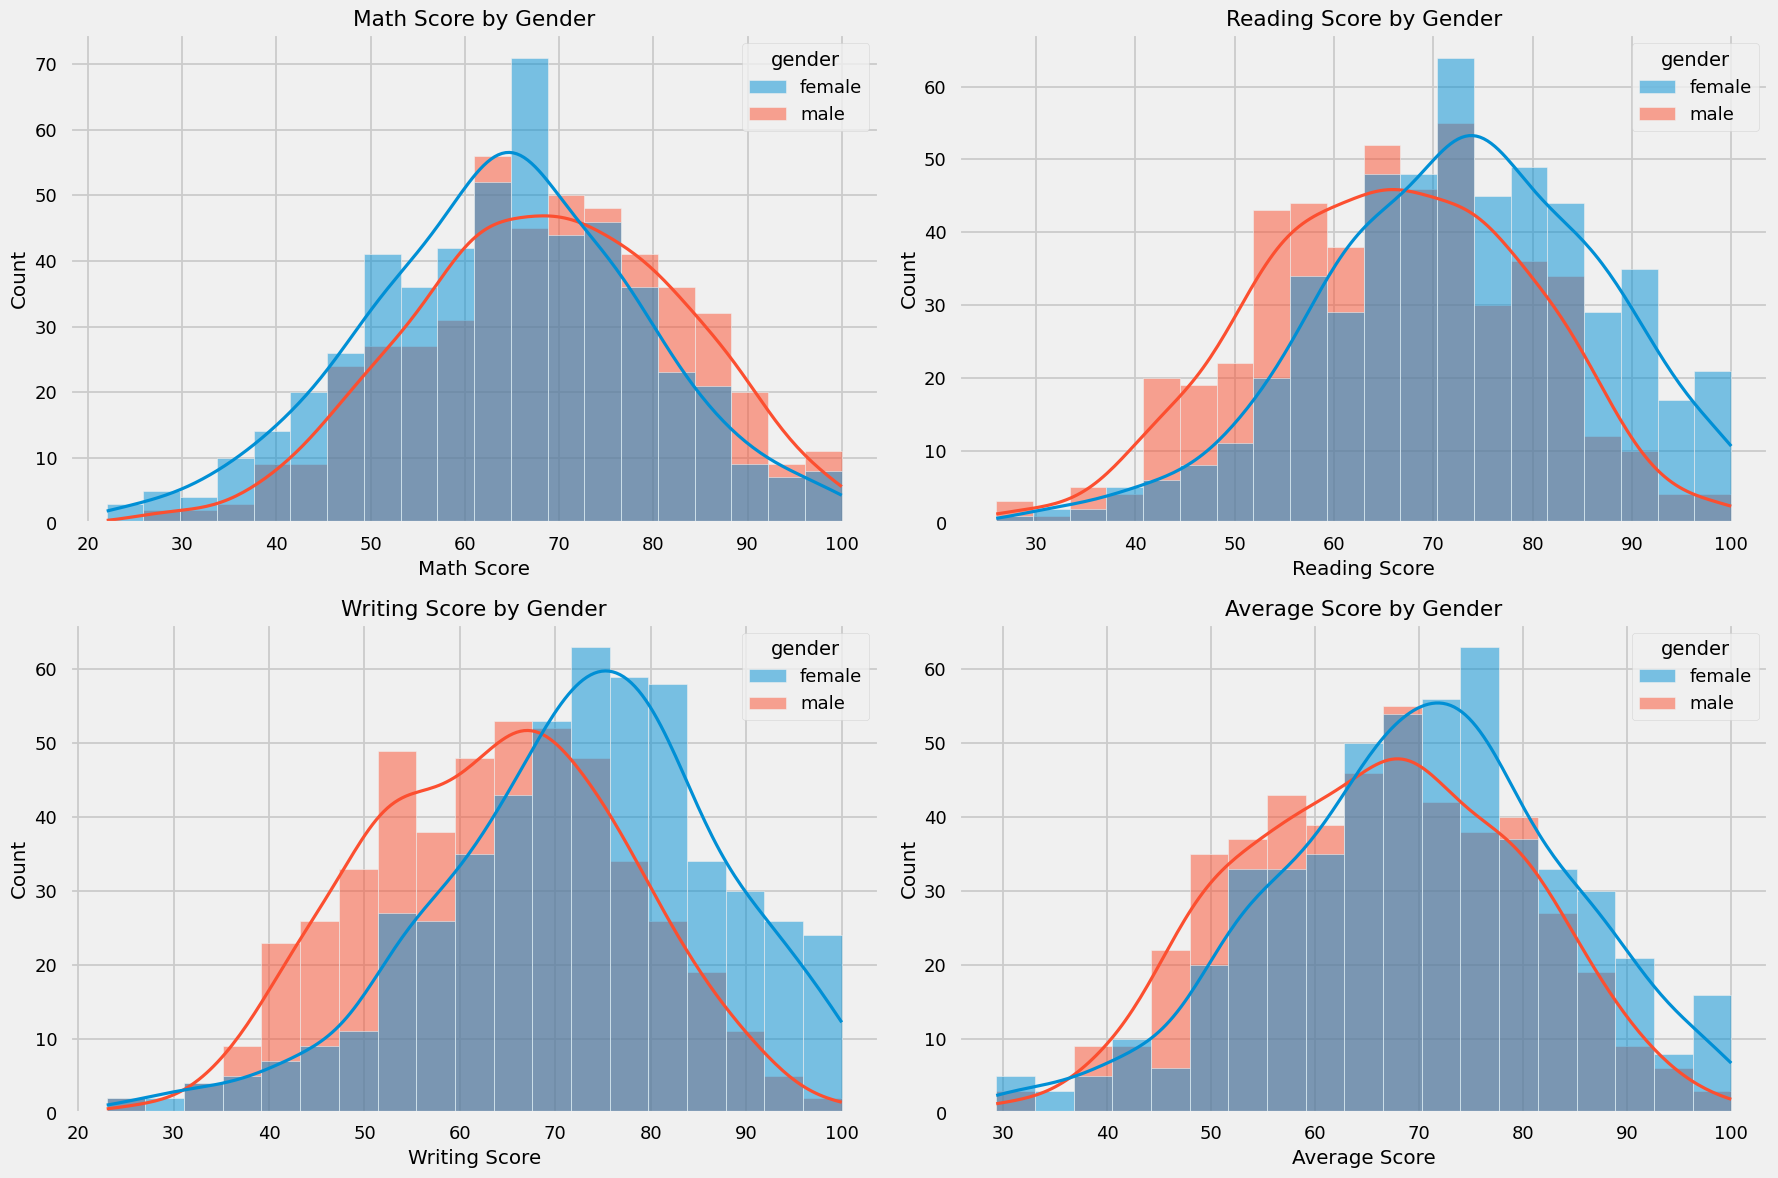

In [ ]:
# Create a figure and a set of subplots
fig, axs = plt.subplots(2, 2, figsize=(18, 12))

# Plotting Math Score by Gender
sns.histplot(x=df['math score'], hue=df['gender'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Math Score by Gender')
axs[0, 0].set_xlabel('Math Score')
axs[0, 0].set_ylabel('Count')

# Plotting Reading Score by Gender
sns.histplot(x=df['reading score'], hue=df['gender'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Reading Score by Gender')
axs[0, 1].set_xlabel('Reading Score')
axs[0, 1].set_ylabel('Count')

# Plotting Writing Score by Gender
sns.histplot(x=df['writing score'], hue=df['gender'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Writing Score by Gender')
axs[1, 0].set_xlabel('Writing Score')
axs[1, 0].set_ylabel('Count')

# Plotting Average Score by Gender
sns.histplot(x=df['average'], hue=df['gender'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Average Score by Gender')
axs[1, 1].set_xlabel('Average Score')
axs[1, 1].set_ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()


####  Insights :
The distribution plots show that female students generally have higher and more concentrated scores in reading and writing, while male students have slightly higher math scores and a broader distribution across all subjects.


<ipython-input-261-d861db511dbb>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
<ipython-input-261-d861db511dbb>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
<ipython-input-261-d861db511dbb>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


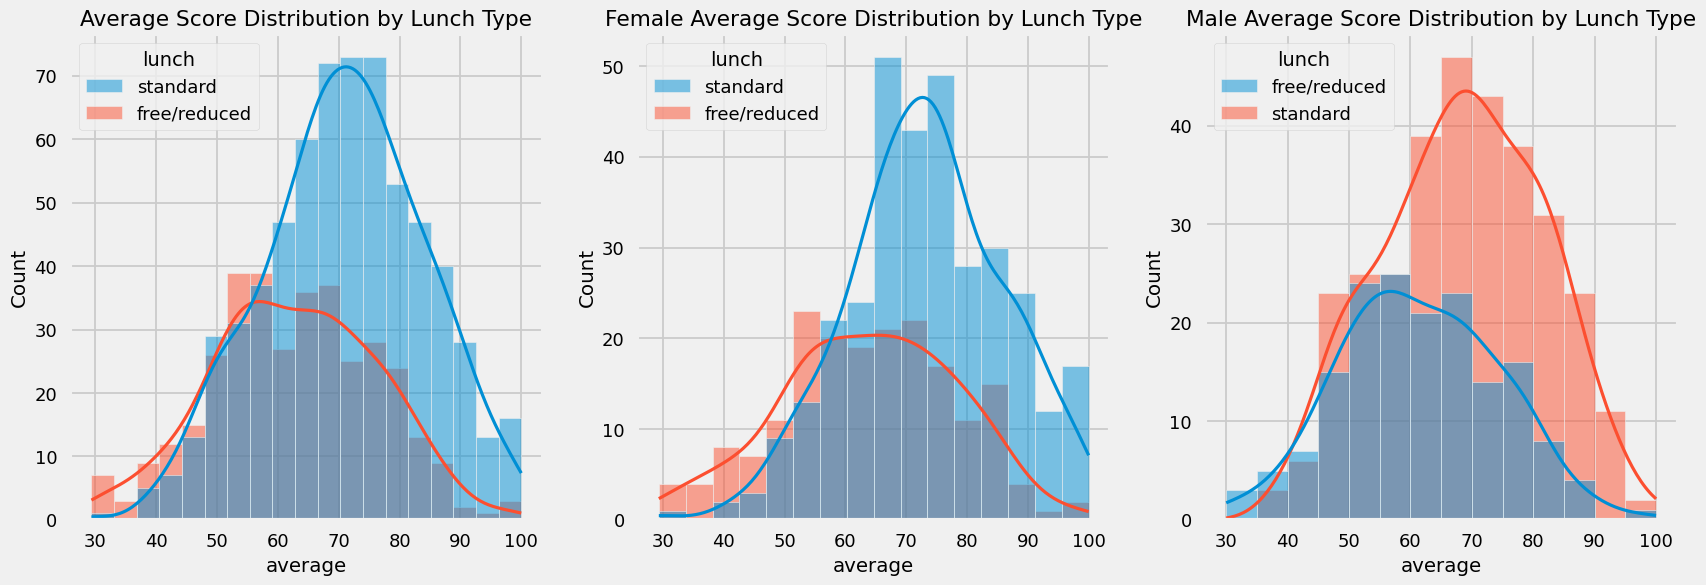

In [ ]:
# Create subplots with 1 row and 3 columns, setting the figure size
plt.subplots(1, 3, figsize=(25, 6))

# Create the first subplot for the average score distribution by lunch type
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.title('Average Score Distribution by Lunch Type')

# Create the second subplot for the average score distribution by lunch type for female students
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='lunch')
plt.title('Female Average Score Distribution by Lunch Type')

# Create the third subplot for the average score distribution by lunch type for male students
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='lunch')
plt.title('Male Average Score Distribution by Lunch Type')

# Display the plots
plt.show()


####  Insights :
Math Scores: Students with standard lunch have higher peaks around the 70-80 range, indicating better performance compared to those with free/reduced lunch.

Reading Scores: Similar trend as math scores, with standard lunch students showing higher concentration around 70-80, while free/reduced lunch students are more spread out with lower scores.

Writing Scores: Standard lunch students again perform better with peaks around 70-80, whereas free/reduced lunch students show a wider distribution with lower peaks.


<ipython-input-262-4e707da41a57>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
<ipython-input-262-4e707da41a57>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
<ipython-input-262-4e707da41a57>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


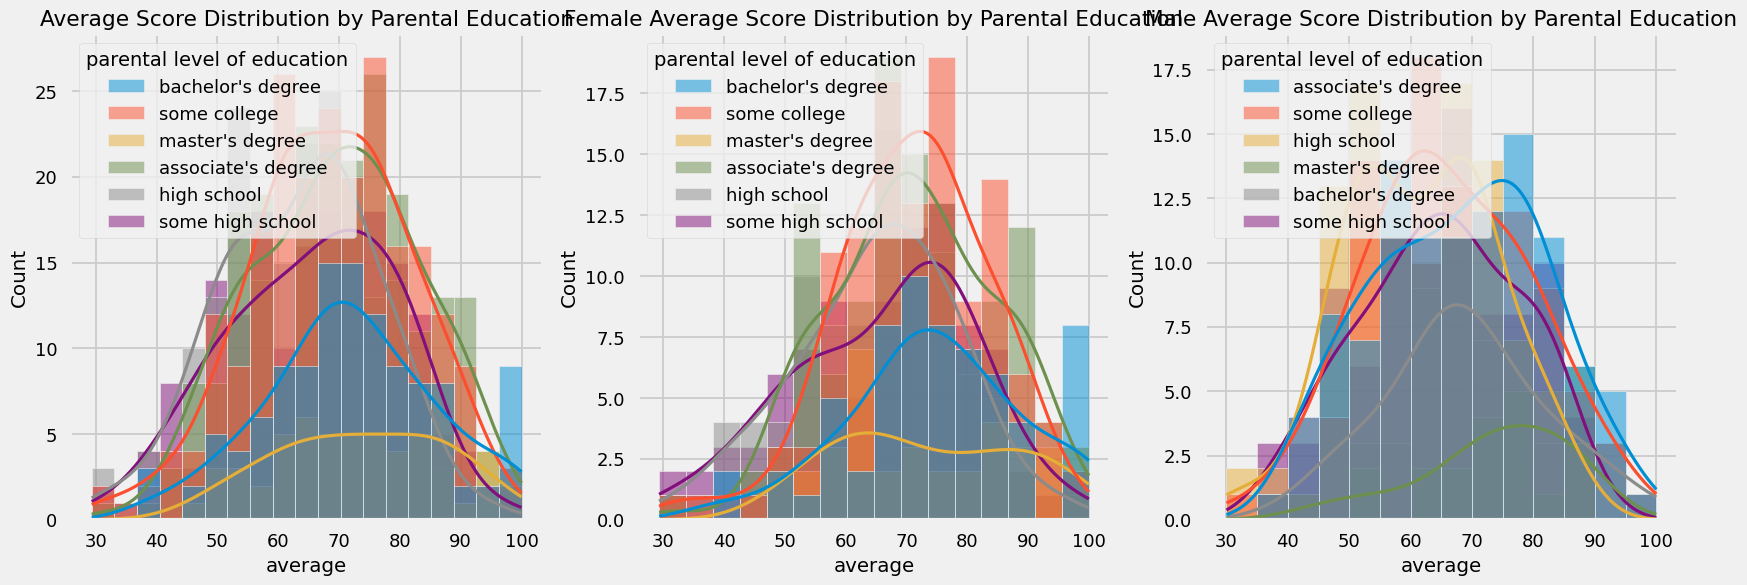

In [ ]:
# Create subplots with 1 row and 3 columns, setting the figure size
plt.subplots(1, 3, figsize=(25, 6))

# Create the first subplot for the average score distribution by parental level of education
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='parental level of education')
plt.title('Average Score Distribution by Parental Education')

# Create the second subplot for the average score distribution by parental level of education for female students
plt.subplot(142)
sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='parental level of education')
plt.title('Female Average Score Distribution by Parental Education')

# Create the third subplot for the average score distribution by parental level of education for male students
plt.subplot(143)
sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='parental level of education')
plt.title('Male Average Score Distribution by Parental Education')

# Display the plots
plt.show()


#### Insights :
Bachelor's Degree:
Scores are more concentrated around 70-80.
Indicates higher average scores compared to other education levels.

Some College:
Scores are distributed across a wider range, but with a peak around 60-70.
Shows a moderate performance level.

Master's Degree:
Limited data points, but scores are generally higher with a peak around 75-85.
Indicates very high performance among students with parents having a master's degree.

Associate's Degree:
Scores are spread out with peaks around 60-70.
Similar to the pattern seen in "some college".

High School:
Scores are widely distributed with peaks around 55-65.
Indicates lower performance compared to higher education levels.

Some High School:
Scores show a broad distribution with a peak around 50-60.
Reflects the lowest performance among all education levels.

<ipython-input-263-0088942d1bc5>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(141)
<ipython-input-263-0088942d1bc5>:10: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(142)
<ipython-input-263-0088942d1bc5>:15: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(143)


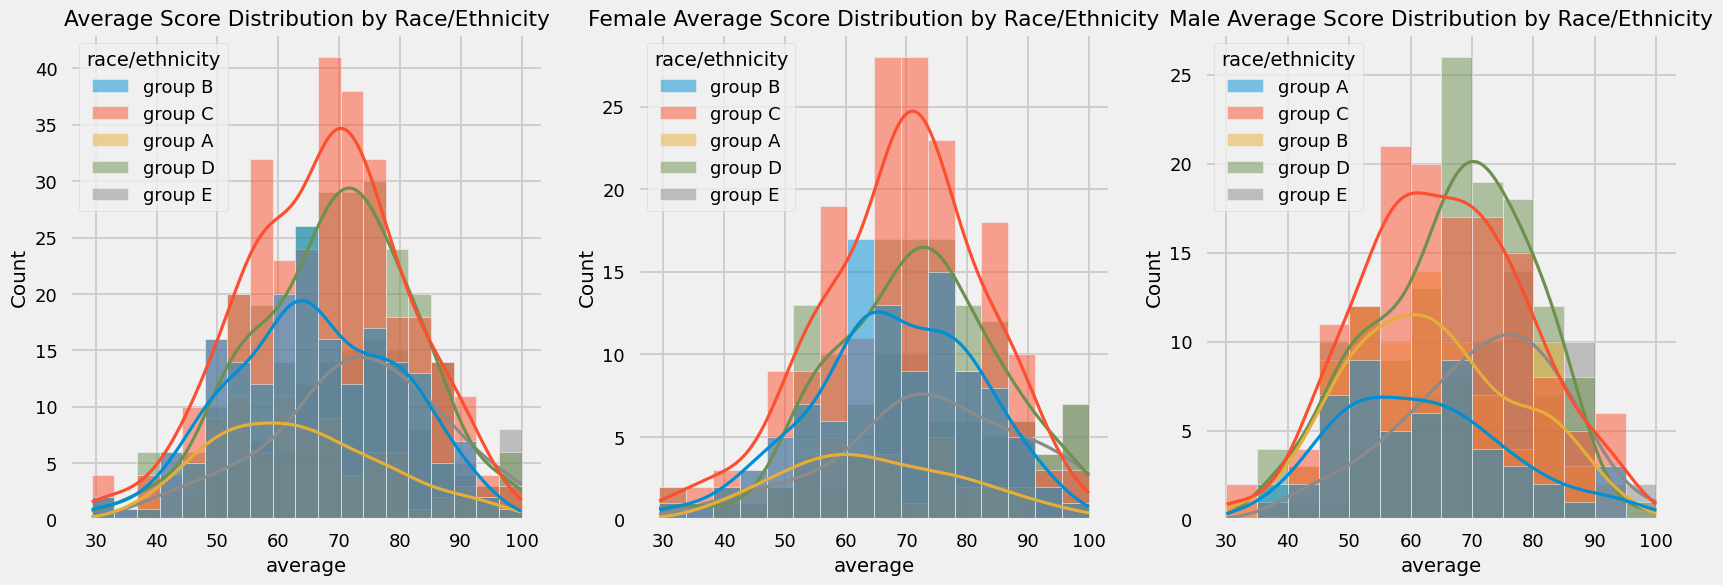

In [ ]:
# Create subplots with 1 row and 3 columns, setting the figure size
plt.subplots(1, 3, figsize=(25, 6))

# Create the first subplot for the average score distribution by race/ethnicity
plt.subplot(141)
ax = sns.histplot(data=df, x='average', kde=True, hue='race/ethnicity')
plt.title('Average Score Distribution by Race/Ethnicity')

# Create the second subplot for the average score distribution by race/ethnicity for female students
plt.subplot(142)
ax = sns.histplot(data=df[df.gender == 'female'], x='average', kde=True, hue='race/ethnicity')
plt.title('Female Average Score Distribution by Race/Ethnicity')

# Create the third subplot for the average score distribution by race/ethnicity for male students
plt.subplot(143)
ax = sns.histplot(data=df[df.gender == 'male'], x='average', kde=True, hue='race/ethnicity')
plt.title('Male Average Score Distribution by Race/Ethnicity')

# Display the plots
plt.show()


#### Insights :
Group A:
Scores are more evenly distributed with peaks around 60-70.
Shows moderate performance with no strong concentration in higher scores.

Group B:
Scores show a broad distribution with peaks around 60-70.
Indicates moderate performance similar to Group A.

Group C:
Scores are concentrated around 70-80 with a noticeable peak.
Indicates higher performance compared to other groups.

Group D:
Scores show a broad distribution with peaks around 60-70.
Similar performance to Groups A and B, with a slight inclination towards higher scores.

Group E:
Limited data points but scores show peaks around 70-80.
Indicates high performance among this group, similar to Group C

### Conclusions :
Factors Influencing Performance:

Lunch, Race, and Parental Level of Education: These factors are significantly related to students' performance.

Gender Differences: Females tend to lead in pass percentages and are often the top scorers.

Test Preparation Course:There is not a strong relationship between completing a test preparation course and overall student performance.
However, finishing the preparation course has shown some benefits.



## Hypothesis Testing

### Hypothesis:

 Null Hypothesis (H0): There is no significant difference between the average scores of the two groups.

Alternative Hypothesis (H1): There is a significant difference between the average scores of the two groups.


In [ ]:
# Define the control group: students who have completed the test preparation course
control_group = df[df['test preparation course'] == 'completed']['average']

# Define the test group: students who have not completed the test preparation course
test_group = df[df['test preparation course'] == 'none']['average']

In [286]:
# Calculate the mean of the control group and round it to 2 decimal places
control_mean = control_group.mean().round(2)

# Calculate the standard deviation of the control group and round it to 2 decimal places
control_std = control_group.std().round(2)

# Output the calculated mean and standard deviation of the control group
control_mean, control_std


(72.67, 13.04)

In [287]:
# Calculate the mean of the test group and round it to 2 decimal places
test_mean = test_group.mean().round(2)

# Calculate the standard deviation of the test group and round it to 2 decimal places
test_std = test_group.std().round(2)

# Output the calculated mean and standard deviation of the test group
test_mean, test_std


(65.36, 13.55)

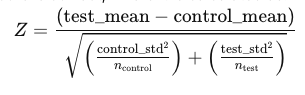

In [314]:
# Calculate the sample size of the control group
n_control = len(control_group)

# Calculate the sample size of the test group
n_test = len(test_group)

# Calculate the variance of the control group divided by its sample size
a = (control_std**2 / n_control)

# Calculate the variance of the test group divided by its sample size
b = (test_std**2 / n_test)

# Calculate the Z-score using the difference in means and the combined standard error
Z_score = (control_mean - test_mean) / np.sqrt(a + b)

# Output the calculated Z-score
print(f"Manual Z-score: {Z_score}")


Manual Z-score: 8.379844629715327


In [315]:
# Set the significance level for the test
alpha = 0.05

# Calculate the critical Z value for a right-tailed test at the specified significance level
critical_z_value = st.norm.ppf(1 - alpha)

# Output the calculated critical Z value
print(f"Critical Z value: {critical_z_value}")

Critical Z value: 1.6448536269514722


In [316]:
if Z_score > critical_z_value:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")


Reject the null hypothesis: There is a significant difference between the groups.


In [317]:
p_value = 1 - st.norm.cdf(Z_score)
print(f"Manual Z-test P-value: {p_value}")


Manual Z-test P-value: 0.0


In [321]:
z_statistic, p_value = sm.stats.ztest(control_group, test_group, alternative='larger')
print(f"Statsmodels Z-statistic: {z_statistic}, P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the groups.")


Statsmodels Z-statistic: 8.291952855943034, P-value: 5.570204377785889e-17
Reject the null hypothesis: There is a significant difference between the groups.


### Conclusion  :
Since the Z-score exceeds the critical Z value and the p-value is less than the significance level, we reject the null hypothesis H0.This means that there is sufficient evidence to conclude that there is a significant difference between the average scores of the two groups. Specifically, students who completed the test preparation course have significantly higher average scores compared to those who did not complete the course.

This conclusion is supported by both the manual calculations and the statsmodels results, which align closely and indicate a strong statistical difference in favor of the group that completed the test preparation course.